Task: Predict the sale prices of houses as accurately as possible.

What do we want to know?  What does this data tell us?  What can we zero in on? Which variables go well with the target variable -- price?

Does number of bedrooms affect the prices of sales, the number of bathrooms?  Square feet living space, size of the lot?

I want to look at price with number of bedrooms, price with sqft_living, and price with bathrooms....

In [3]:
# Import the neccessary librabies for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Get the data
data_kc = pd.read_csv('kc_house_data.csv')

In [5]:
# Make sure that the data was retrieved correcly and inspect what was given
# Noticed that I could possibily change the index to the ID number to go with the house, to clean it up
data_kc.head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [6]:
# Inspect the end of the data, see if there's any funny business
data_kc.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,0.0,...,8,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21588,9834201367,1/26/2015,429000.0,3,2.00,1490,1126,3.0,0.0,0.0,...,8,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21589,3448900210,10/14/2014,610685.0,4,2.50,2520,6023,2.0,0.0,NaN,...,9,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,0.0,0.0,...,9,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [7]:
# Change the index to the ID column and check 
data_kc = data_kc.set_index('id')
data_kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
# Quick look at all the statistic info to make some conclusions.. which are...
# price mean is greater than the median = skewed right
# bedrooms mean is slightly greater than the median 
# bathrooms mean is slightly smaller than the median = skewed left
# sqft_living, sqft_living15, and sqft_lot15 the mean is greater than the median = skewed right 
# (most of the data on the left)
# sqft_lot the mean is smaller than the median = skewed left (most of the data on the right)
# floors, waterfront, view, condition, and grade the mean and median are almost equal = normal
data_kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
# Looking to see what each column has, including type and missing values
data_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


After looking at the quick run down of the data what do we see?

dtypes shows -- there are 8 columns that have float64 values (numbers that are decimals), there are 11 columns that have int64 values (numbers that are whole numbers), and 2 object columns (by looking at the data these columns are the dates and sqft_basement which I feel should be numbers -- **coming back to this...**)

Missing values are in the waterfront column -- seems like they put 0, NaN, and 1 (**Check this with .value_counts()**)

Another column with missing values in yr_renovated -- mostly 0's and then actual years.
The last column with missing values is view.

Let's check how many missing values there are in total -- to see if we can drop anything? Or replace anything.

In [10]:
data_kc.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There 2376 missing values for waterfront, 62 view values, and 3842 yr_renovated values.

Are any of the values significant to our question?  Can any of this values be replaced with the mean, median, or mode?  What would be more beneficial?  What does the numbers in the columns mean?

I feel that waterfront is telling us that either 1 or 0 means yes or no to have a waterfront house.

In [11]:
# Let's see what are the missing values shown as:
print(data_kc.waterfront.unique())
print(data_kc.view.unique())
print(data_kc.yr_renovated.unique())
# All missing values are shown as NaN.

[nan  0.  1.]
[ 0. nan  3.  4.  2.  1.]
[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [12]:
display(data_kc.waterfront.value_counts())
# By looking at the .value_counts(), I feel correct
# in saying that it tells me that it's either yes or no to having a waterview front house.
# There is a total of 19221 values with 2376 missing values which was noted above.
# What is the percent of the missing values compared to the rest of the data?
print('% of missing values:', 2376/21597)
print('average of waterfront values:', round(data_kc.waterfront.mean()))
# We can replace the missing values of waterfront with 0.

0.0    19075
1.0      146
Name: waterfront, dtype: int64

% of missing values: 0.11001527989998611
average of waterfront values: 0.0


In [13]:
# We can replace the missing values of waterfront with 0.
data_kc.waterfront.fillna(value=0, inplace=True)
data_kc.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
# Let's take a deeper look into view -- which is how many times the house as been viewed
display(data_kc.view.value_counts())
print('Mean_view:', data_kc.view.mean())
print('Median_view:', data_kc.view.median())
# After looking at the data, I feel that view values of NaN can be changed to 0 as well.
data_kc.view.fillna(value=0, inplace=True)
display(data_kc.isna().sum())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Mean_view: 0.23386272870808952
Median_view: 0.0


date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [15]:
# Let's take a deeper look into yr_renovated -- which displayed the year the house was renovated
display(data_kc.yr_renovated.value_counts())
# This shows that 17011 out of the 21957 values are 0. And 3842 of the values are NaN.
# I feel that we can replace the 3842 values with 0 as well.
data_kc.yr_renovated.fillna(value=0, inplace=True)
display(data_kc.isna().sum())
# After this step, there are no more missing values to consider.

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
# All the missing values in the data have been accounted for.  Let's look again to the info.
data_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


In [17]:
# There are two columns that show they are object columns, let's look at the sqft_basement.
data_kc.sqft_basement.value_counts()
# Number one: This column is not object(string), they are floats, because they have decimals.
# Number two: This column also has missing values, except that they are writting as '?' instead of NaN
# What can we do with that information?

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
1798.0        1
2050.0        1
475.0         1
2390.0        1
1990.0        1
2130.0        1
1880.0        1
915.0         1
2300.0        1
1816.0        1
1852.0        1
2360.0        1
295.0         1
1248.0        1
2400.0        1
588.0         1
1281.0        1
225.0         1
248.0         1
243.0         1
784.0         1
556.0         1
374.0         1
1275.0        1
266.0         1
516.0         1
2120.0        1
3500.0        1
207.0         1
2490.0        1
Name: sqft_basement, Len

In [18]:
# One we can find the mean, median, and mode (even though you can see the mode is 0) and 
# decide which one it could take.
# Can't do this yet because the type is under object not float...
print('Mean sqft_basement:', data_kc.sqft_basement.mean())
print('Median sqft_basement:', data_kc.sqft_basement.median())
print('Mode sqft_basement:', data_kc.sqft_basement.mode())

TypeError: Could not convert 0.0400.00.0910.00.01530.0?0.0730.00.01700.0300.00.00.00.0970.00.00.0?0.0760.0720.00.00.00.00.0700.00.0730.00.00.00.0820.00.0780.0790.0730.00.0330.00.00.01620.0?0.0360.00.00.00.00.0588.00.01510.0410.0990.0600.00.00.00.00.00.0560.00.00.00.0550.01000.00.00.00.01600.01700.00.0500.00.0700.01040.0880.00.0500.0?0.00.01010.00.00.0240.00.0790.00.0265.00.00.00.0290.0290.0910.00.00.0600.00.0800.0540.00.00.00.0880.0500.00.00.00.00.0560.0?1000.0710.0?0.00.00.00.0840.00.00.0380.00.0770.0480.0800.0600.00.00.0570.01490.0620.00.00.01010.01250.00.00.00.01270.0600.0120.0650.00.0180.00.01130.0450.00.00.00.01640.00.00.01460.01020.00.00.01030.00.00.0750.01010.0400.0640.00.01070.00.00.0490.00.01310.00.0300.0650.00.0630.0290.00.0700.00.00.0990.02000.0390.00.00.0800.0430.00.00.0760.00.00.0840.00.00.00.00.00.00.0400.00.0850.00.00.00.0700.00.0210.00.00.00.00.01430.0?1950.00.00.0400.00.0440.00.00.00.0600.0450.00.0220.00.01160.00.0860.00.0580.0300.0300.02060.00.00.00.00.0240.00.01820.00.00.0790.0570.00.00.0600.00.00.01180.0380.00.00.0200.00.0780.00.00.00.00.00.0650.0300.00.00.00.00.0500.00.00.0970.00.01150.0990.00.01200.00.0680.00.0650.0530.01450.0500.00.01170.00.01010.0700.00.00.00.0700.0500.01950.00.0970.00.01080.0960.0400.00.00.0?390.00.0280.01600.01600.0600.0870.00.0300.00.00.00.00.00.0280.0280.00.00.00.0780.0910.00.00.00.00.00.01070.00.00.00.00.0620.01200.00.00.00.00.00.00.01250.00.00.0600.0200.0500.01100.00.00.00.0460.00.00.00.0770.01400.00.00.00.0530.0720.00.01080.01080.00.00.00.0530.0530.00.00.00.01010.00.0970.0?0.00.0490.00.0660.00.00.00.00.00.00.01220.00.0900.00.0420.01580.00.00.00.0180.00.00.00.00.00.00.00.00.00.01380.0475.0910.00.00.00.00.00.00.00.0500.00.0580.0240.00.00.00.0690.00.00.0270.01400.00.00.0580.00.00.0350.00.00.00.0935.00.01040.01150.0710.00.00.0650.00.00.00.0200.01370.00.00.00.00.00.00.00.00.00.0350.00.00.00.0980.01040.00.00.0530.0200.00.01130.0850.00.00.0450.00.0700.01000.00.00.00.0620.00.00.0440.0440.0360.0400.01470.0300.00.00.0630.00.00.00.00.00.0160.0?0.0850.00.00.00.0950.00.0400.00.01370.00.00.00.01010.00.00.00.00.00.00.00.0460.00.00.00.00.00.00.0500.00.00.00.00.050.00.00.00.00.0350.0740.00.01040.0800.00.00.00.00.01780.00.00.00.0820.00.00.00.0710.00.00.0630.00.0290.00.00.0800.00.0290.00.00.01900.00.00.00.00.0600.00.0340.00.0200.00.00.0730.0820.00.00.00.00.0470.00.00.00.00.00.00.00.00.00.01450.0160.00.0370.0700.00.0640.00.00.00.0540.00.00.00.00.00.0730.00.0820.00.0140.00.0570.0280.00.00.0370.0480.0?120.00.00.00.00.01000.0500.0910.01760.0130.00.0?0.0450.00.00.00.0470.0800.0770.00.00.01600.00.0800.00.00.0700.00.00.0?0.00.00.00.0800.0690.0?880.00.0600.0520.00.00.0890.00.0470.00.00.0630.00.0?0.00.00.00.0400.00.00.0130.00.00.01220.0580.0840.00.00.00.0450.0300.00.00.00.01020.00.0400.00.00.00.00.0450.0700.00.00.00.00.00.00.00.0370.0970.0520.00.00.0340.00.0600.00.00.0270.00.00.0640.0660.01110.00.00.0150.00.00.0600.00.0710.00.0180.0440.0350.01010.0140.00.0600.0?1720.01040.00.00.00.0140.00.00.0780.00.01200.00.0960.0810.00.00.00.00.00.01000.0160.0850.00.01760.00.0620.0190.00.00.00.00.00.0800.00.0330.00.01290.00.00.0670.00.00.00.00.00.01510.00.00.00.00.00.01030.00.00.00.0340.00.00.01800.00.00.00.00.00.00.00.01120.0680.0680.00.0500.00.00.00.0800.00.00.01110.00.0690.00.00.01220.00.0700.0400.00.00.00.00.00.01810.0530.0620.00.00.0340.0640.00.00.00.01180.00.00.00.00.0420.00.00.00.00.00.00.0960.0600.0400.01460.00.00.00.0500.00.00.0390.01000.0?680.0770.01040.0620.00.00.00.00.0?0.00.0210.00.01380.00.0350.00.0630.00.01250.060.0400.00.00.00.0660.0700.00.0900.00.01050.00.0940.0310.00.00.00.00.00.00.0930.0560.01390.0640.0640.0290.01150.00.01020.00.0270.0610.01830.00.00.0710.00.00.00.00.01040.0910.00.0580.00.00.00.00.00.0340.00.00.00.00.00.00.0950.00.00.00.00.00.0270.00.01110.0310.00.0120.00.0700.00.00.00.01300.00.00.00.0510.01330.00.00.00.050.0570.0360.00.00.00.0500.01590.00.00.00.0?0.00.00.00.00.0500.00.00.00.00.00.00.0430.0700.0840.00.00.00.00.00.0470.00.00.00.00.00.00.00.00.00.00.00.0350.00.01380.00.00.0530.01620.0800.00.00.00.0210.0800.0770.00.0550.00.0940.00.00.0700.0810.01000.00.00.0940.00.00.0400.0630.00.00.00.01200.00.00.00.00.0200.00.00.01200.00.01200.01040.0?990.0920.0360.0810.00.00.00.00.0550.00.01040.01040.00.00.00.00.00.01270.01320.0570.00.00.0400.00.00.00.00.0240.0420.00.00.0?0.00.00.00.00.00.00.00.00.00.00.0490.01420.00.00.00.00.00.01010.0700.00.0990.0990.00.01240.0670.01960.00.01250.0140.00.00.00.01010.0840.00.00.00.00.00.00.00.00.0600.01560.00.00.00.00.01050.00.00.00.0440.0760.00.02020.00.0340.00.00.01220.0860.00.00.00.00.00.00.0280.0960.0700.00.00.00.0750.0960.00.00.01250.00.00.0600.00.0690.00.00.01190.0400.00.00.02110.00.0550.0790.0790.00.0420.00.0?1250.0630.0840.00.0300.00.0960.00.00.0960.00.00.01000.0990.00.00.0770.0770.00.00.0600.00.00.0820.00.00.00.00.0330.00.00.01030.00.01400.00.00.00.00.00.0800.00.0890.0700.00.01200.0940.0940.0470.00.01490.0400.00.00.0660.00.01280.0730.00.01240.00.00.0640.0640.01150.00.00.0530.0120.00.00.0560.00.00.00.00.00.00.00.00.0700.0380.00.0240.00.00.0250.00.0350.00.0560.01300.0330.0700.00.00.00.0220.00.00.00.00.0500.00.01020.0950.00.00.02390.00.00.0550.0190.00.00.0300.00.00.00.0370.00.00.00.0500.0820.0840.00.00.00.00.00.00.00.00.00.0960.0400.01230.0170.00.00.0640.0750.00.0900.00.0700.0430.01600.0?0.0?880.0750.01780.00.0830.00.0620.0460.00.0?0.00.0800.00.0780.00.0650.00.0730.00.0640.00.0480.00.0650.0450.01330.00.00.00.0290.00.0200.00.00.00.00.00.0950.00.00.00.00.00.00.0720.00.00.00.00.0650.0650.00.00.01100.00.0800.00.00.0450.0300.00.00.0250.02020.00.00.00.00.00.00.00.0600.00.0950.00.0120.01700.0920.00.0530.01290.0400.00.0720.0940.00.00.0290.01280.00.00.00.0700.00.00.00.0700.00.01150.00.00.0600.00.00.00.00.00.00.0250.0850.00.01220.00.0150.00.00.00.00.0?0.00.00.00.00.00.00.0740.00.0530.0480.00.00.00.00.00.00.00.0390.01100.01260.0690.00.00.01380.00.00.01030.0830.00.00.00.00.01250.00.00.00.0530.0600.0760.00.00.00.00.00.0900.00.0370.0860.0670.00.00.0600.0280.00.0240.0930.00.00.00.01410.00.0240.0400.0880.01110.00.00.0330.00.0820.00.00.00.0600.00.00.00.00.0860.0280.0?0.0840.0480.0760.00.00.00.00.00.00.0830.0780.0890.00.01340.00.00.00.0700.0150.0550.0910.00.00.00.00.0550.00.00.00.00.0340.01450.0790.00.00.00.00.00.00.0590.0?0.00.0660.01500.00.0890.00.0380.0660.01000.00.00.00.00.0420.00.00.00.01160.00.00.00.00.00.0610.00.00.0530.00.00.00.01190.01010.00.00.0300.01000.01020.00.0330.00.00.00.00.0720.0470.0140.00.00.00.00.00.00.00.0730.00.0220.0920.00.00.00.0?0.00.0940.0800.01140.00.0?800.00.0500.00.01300.00.00.01180.0440.00.0550.0960.00.0960.00.00.00.00.00.00.00.00.00.00.01800.00.00.00.0360.00.00.00.00.00.0840.0350.00.00.0600.00.0240.00.0750.00.00.0590.01400.00.01070.00.00.0400.00.0960.00.0450.00.0780.01110.0700.00.0780.00.00.00.01000.00.01400.00.00.00.01320.00.00.00.00.00.00.0600.0140.00.0260.00.0800.00.00.00.01010.00.01000.00.0710.00.00.0140.00.0340.00.0?0.01280.00.00.00.0440.00.01580.0180.0100.00.00.0330.00.0910.00.0630.00.00.00.00.00.00.0900.01070.00.0900.0620.0140.00.00.00.00.00.00.0?0.00.0400.01020.00.00.00.00.00.0470.00.00.0800.00.0500.00.0520.01000.0530.0150.00.0680.01180.00.00.0300.0750.00.01270.00.0750.01800.0500.0320.00.01000.0850.00.00.0200.00.0920.00.00.0830.0380.0600.0?0.00.0770.00.00.01480.0380.01190.0460.00.00.0310.00.0850.01280.00.01230.01040.00.00.00.01260.00.00.00.00.00.01010.00.00.0400.00.00.00.00.0400.00.00.00.00.01010.0500.00.00.0290.00.0620.01060.0640.0910.0400.0360.0930.00.00.00.00.00.00.00.0580.00.00.00.00.00.01284.00.0430.01000.00.00.0450.0720.00.00.01240.0760.00.0830.0780.00.00.00.00.00.00.00.0460.01400.0690.00.01370.0400.00.0640.00.0260.0580.0750.00.00.0890.00.00.00.00.01330.00.00.00.0940.01670.00.00.00.00.00.00.00.00.00.00.00.0440.01350.00.00.01040.00.00.01020.0360.00.00.01510.00.00.00.00.00.00.00.01170.00.00.00.00.0390.0760.00.00.0800.00.00.00.00.00.00.00.0650.00.0270.0900.0820.01800.00.00.00.00.00.00.01120.00.00.00.00.00.0260.00.0640.0730.0290.00.00.01620.00.00.0?0.0740.00.0400.0380.00.0520.00.00.00.00.00.00.00.00.0390.00.00.00.00.00.00.0520.00.00.0100.01080.00.00.00.0190.00.00.0920.00.0600.00.00.00.0800.00.00.00.00.02570.00.00.01320.00.00.00.01060.00.01030.0810.00.0400.0630.0440.00.00.0320.00.00.0360.0400.0670.0880.02110.00.0720.0700.00.0580.0540.01490.01150.00.00.00.00.0?0.00.0?0.01090.00.00.00.0740.0?960.0570.0240.0760.00.00.00.0720.0400.0420.0750.00.00.0550.00.00.0480.0800.0?0.00.00.00.0510.00.0400.00.0310.00.00.0?0.0700.01580.00.00.00.0370.0110.0700.01300.01480.00.00.00.00.00.00.00.01010.00.0600.00.00.0530.00.00.00.0810.00.00.0980.0460.00.00.0?0.00.00.00.00.00.0610.01410.00.00.00.00.0200.0820.00.00.0?0.00.00.0750.00.00.00.01480.0430.00.00.00.0700.0460.00.01200.00.02500.0140.00.00.00.0120.00.0750.0720.00.00.00.0880.00.01300.00.0470.090.0990.00.00.0440.00.00.00.0590.0770.00.01320.00.00.01940.01200.00.0880.0500.00.00.00.00.0660.0100.0950.0240.0600.00.0420.0760.0800.00.00.00.00.0650.00.0700.0720.00.00.0830.01070.00.01400.0450.00.00.00.00.00.00.00.00.0320.0360.00.01280.00.0810.00.0860.00.01100.00.00.01350.00.0610.00.0850.00.00.0?300.00.00.0100.0340.01380.0790.0610.00.00.00.00.00.0610.00.01300.00.0160.00.00.00.00.00.00.0260.0540.00.00.00.00.00.00.00.0930.00.0760.01020.0950.01230.0430.0700.00.01550.01300.00.0500.00.0630.00.0800.01000.0580.00.00.0350.01260.00.00.00.00.00.01280.00.00.00.00.00.00.0570.0810.0980.02350.00.00.00.00.00.0550.00.01050.01190.00.00.00.00.0590.00.01160.00.00.0450.00.00.00.00.0420.00.0880.00.00.01110.00.00.00.00.00.00.0700.00.00.00.0260.0200.0740.00.00.02490.00.01340.00.00.01340.00.0240.01481.00.00.01360.0560.00.00.00.00.0770.00.00.00.00.01140.00.0700.00.0260.0300.00.0400.00.00.0?0.00.00.00.0820.00.00.0330.00.00.00.00.00.00.01150.00.0530.0530.0250.00.00.00.00.0920.0690.00.00.0420.0920.00.00.0560.0480.00.0450.00.0150.00.00.01000.00.0300.00.00.00.00.00.00.00.00.0?0.01135.00.0200.0200.00.00.0620.00.0600.00.00.00.00.00.00.0220.00.00.00.0580.00.0560.0840.00.01330.00.00.00.0960.0790.01350.00.00.00.01470.01380.01380.0520.01110.0300.01130.0900.00.0480.00.0290.00.00.0800.00.00.00.00.00.0590.00.00.0?0.00.00.0200.00.00.00.0620.00.00.00.0600.00.00.00.0240.00.00.0750.00.00.0120.00.00.00.00.00.0?450.0480.00.0980.00.00.0200.00.0450.00.00.0290.01520.00.0600.0600.00.00.0500.01850.0460.00.0300.00.00.0520.00.00.00.00.01140.00.0400.00.00.00.00.01830.01660.01390.0780.01250.01260.0620.0400.0?0.01050.0400.0?600.01010.00.02130.00.00.00.0450.00.0660.00.0770.00.00.0280.0240.00.00.00.00.00.0210.00.0510.01200.00.00.0560.0430.0810.0560.0180.00.00.00.00.00.0780.00.0850.00.00.01180.01020.0690.0870.00.0430.02600.00.00.0500.0630.00.00.00.00.00.00.0530.00.00.01450.01200.00.01120.0470.0840.0770.0730.00.0440.00.00.00.01120.0940.00.00.00.01080.00.00.0380.01850.0260.0130.00.00.0560.00.00.00.00.0530.0700.00.0920.0600.00.00.0720.00.01130.00.00.0720.01690.0650.00.00.00.00.0390.00.00.0?750.0530.00.00.0790.00.0450.0720.00.0160.0620.00.0850.00.0250.0990.00.01850.00.00.00.00.0390.01070.0760.00.00.00.00.00.00.00.0390.01020.00.00.01100.0900.00.00.00.00.0490.01400.00.00.01040.00.01070.00.00.0550.0600.0780.0880.00.0750.0800.0540.0130.00.0440.0640.01140.01080.00.00.0420.00.00.00.0400.00.0243.00.00.00.0600.00.0250.00.00.01600.00.0530.00.0890.00.0370.00.00.00.00.0260.00.00.00.00.01210.00.0480.00.00.0670.0450.00.0600.00.00.00.00.0890.00.00.00.0400.00.01520.00.00.00.0700.01780.00.00.01010.0240.0400.00.00.00.0820.0860.00.0700.00.00.00.00.00.00.00.0?0.00.00.0690.00.00.0910.00.0800.00.0600.00.00.0720.00.0710.00.00.0990.00.0600.0640.00.0340.0700.00.0700.00.00.0570.00.0960.0570.00.00.00.00.00.00.01000.00.0470.00.0650.00.0670.00.00.060.00.00.00.00.0860.00.00.0900.00.0680.0420.00.0800.00.00.00.0700.00.00.0140.0340.00.00.0580.00.0600.01320.0520.0980.00.00.0490.00.0700.0820.0580.00.0620.00.00.00.0750.00.0830.0890.0??650.0560.0300.0400.00.00.00.0?0.00.00.00.00.00.00.00.01040.00.00.00.01350.00.00.00.00.0370.00.00.01260.00.01330.00.00.00.00.060.00.00.00.00.0600.00.01220.00.0630.0320.00.00.00.01020.0930.00.0630.0260.01400.0?0.00.01200.00.00.01000.01020.00.00.0170.00.00.00.0800.00.0760.00.00.00.0500.0?600.00.01150.00.01000.01110.0700.0660.0810.00.00.00.0720.00.01110.00.00.00.00.00.00.00.00.01120.00.0830.0220.01600.00.0800.01140.00.00.00.0360.0980.0270.00.0?0.00.00.0?630.0860.00.00.00.0600.0480.00.0300.00.01430.0300.00.0720.0800.00.00.00.0500.00.0500.00.01040.0990.00.00.0980.0860.0720.0900.00.00.0440.00.00.00.00.00.0620.00.00.00.00.00.00.00.00.01400.0680.0100.0860.00.00.00.00.01230.00.0200.00.0750.00.01240.01024.0350.00.0?0.00.0580.00.01120.0200.00.0420.0740.00.0970.00.00.00.0650.00.00.0140.00.00.0710.00.0850.01300.00.0880.00.01798.0240.02060.0800.00.0360.00.0450.0620.00.00.0640.0800.00.00.0550.00.00.00.01010.00.0310.0800.00.00.0200.00.00.00.0400.0330.00.00.00.00.0300.00.00.00.0690.00.0630.00.00.00.0800.00.00.0830.0500.00.00.00.00.00.00.00.00.0700.00.00.00.00.0260.0260.0760.0320.00.00.00.0650.00.00.01210.00.00.0430.00.00.0910.00.0500.00.00.0300.00.00.0790.0860.0940.00.01610.0880.0190.0400.0?200.00.00.01780.00.00.00.01330.00.00.0480.00.0100.00.00.01440.00.00.00.0530.00.01200.00.0170.00.00.00.00.0930.00.0190.00.01190.00.00.0430.00.00.0290.00.0200.00.00.00.00.0710.00.0?570.01000.00.00.00.0360.01590.0570.0280.00.00.0880.01320.00.00.0310.00.0810.00.01120.00.00.00.00.00.0430.0800.00.0670.0860.00.0380.0400.00.00.00.00.0750.00.00.0600.0360.00.00.00.00.0320.00.00.00.00.00.00.00.00.0500.00.00.00.0800.01500.0510.00.00.00.00.00.00.00.00.00.0500.0930.0560.00.00.01170.0800.00.00.01450.00.0450.0700.00.0700.00.0820.0690.0340.00.00.01010.00.0500.0300.00.00.0800.00.0400.0480.00.00.00.0220.00.00.00.00.00.0400.00.0?0.0450.0960.00.00.00.00.00.00.0780.0140.0520.01250.00.00.0190.00.00.00.0760.01250.00.0620.00.01250.01600.00.00.00.00.0940.00.01290.00.00.01330.0650.00.00.0620.00.00.00.00.00.0770.0900.0900.00.00.00.0900.0700.00.0910.00.00.00.00.00.0550.00.0180.0890.00.00.00.0200.0950.00.0240.00.0310.00.0310.0780.01300.00.00.00.00.00.00.0600.0400.00.00.00.00.00.0890.00.01010.0780.0910.00.00.00.0500.0460.0990.0860.00.00.00.00.0720.00.0110.00.0460.00.01690.00.0740.00.00.0900.00.0480.00.01070.00.00.0400.0?0.00.00.0300.0300.00.0220.0260.00.0180.00.00.0120.0500.01500.00.0620.00.00.00.00.01300.00.00.0530.00.0720.00.01010.0420.0900.00.01290.00.00.00.00.00.00.00.0700.00.00.00.00.00.0930.0120.00.0550.00.00.00.01470.00.00.01130.0160.01030.0960.00.00.0910.00.00.00.00.00.00.00.0250.00.00.00.0840.0500.0590.0500.0820.00.00.0850.00.0240.00.00.0320.00.00.0940.00.00.00.00.00.00.00.00.0450.00.01320.00.00.00.00.0920.00.01060.0400.01070.00.00.01030.01060.00.0460.0100.00.00.00.00.00.0570.00.0810.01570.00.00.00.0270.0660.0200.00.00.0860.00.0980.0980.00.0590.00.00.01200.01400.0860.01160.00.00.00.0700.0400.00.00.00.00.00.01590.00.00.00.00.00.00.0840.00.00.00.01250.00.0150.01000.0920.0430.00.00.01120.00.00.01100.01200.00.00.00.0380.0980.00.0380.01250.0?1070.00.00.00.01650.00.01120.00.0120.00.00.00.0800.00.0920.00.00.00.00.00.0704.0520.0960.0470.00.00.0990.00.00.00.0440.00.01500.01110.01250.0180.0950.01510.0440.00.00.00.00.00.01020.01910.00.00.0490.0400.00.00.0?0.0700.0600.00.0700.00.01030.00.00.01630.00.00.0400.0600.00.00.00.00.00.00.00.0320.01240.00.00.00.0790.00.0200.00.0910.0480.0960.00.00.0520.0160.0810.00.0650.01100.0260.0220.0430.0290.00.00.00.00.00.0840.00.02360.0500.01110.0?0.00.0990.00.00.00.0880.0540.00.0320.00.0490.0480.0200.00.0770.01852.00.00.0600.00.00.0500.00.00.00.0530.0450.0420.00.00.00.0350.0350.00.00.02090.00.00.01020.0600.0820.0660.0840.00.0750.00.0810.0670.00.0270.01310.00.0400.00.00.0400.00.00.00.00.00.0300.0850.0200.00.00.00.0370.00.0510.0890.00.00.0800.00.0960.00.01170.0460.00.00.00.0900.01230.00.00.00.0740.00.0450.00.0920.0450.0?0.0770.0700.00.00.00.0660.00.00.0450.00.02400.00.00.00.01170.00.0250.0620.01480.01040.00.00.0880.01040.00.00.00.0620.00.00.00.00.00.0600.00.0850.00.00.00.00.00.0240.0?0.00.00.0850.00.00.00.00.00.050.00.00.00.00.00.00.0530.0520.0390.00.00.00.00.00.00.00.00.00.0150.00.00.00.00.00.0600.0190.01060.00.00.01380.00.0?1790.00.00.00.0840.00.00.00.01340.00.00.00.01150.00.00.00.01050.01370.00.02150.0500.0570.00.0200.00.00.0590.0750.00.0400.0320.0720.0420.0810.00.00.0920.00.0330.0230.0870.01090.00.00.0720.00.0290.00.01270.00.01320.00.01360.0520.00.0420.00.0170.00.00.00.0240.0770.0600.00.00.01060.0830.00.00.00.0810.0120.0460.0990.0??0.00.00.00.00.00.00.0?0.0220.0980.0200.0260.01200.01370.00.01140.0300.0650.0590.01020.01500.0?810.00.00.00.00.01440.01210.00.00.00.00.00.0980.00.00.0900.00.00.00.00.01500.00.0400.00.00.00.00.0680.00.0290.0120.00.0500.070.00.0960.0850.0840.0140.00.00.01430.00.00.0960.01400.00.0400.00.00.00.00.00.00.0610.00.01120.0960.00.0520.00.0790.01030.00.0820.00.00.0960.00.0840.00.00.00.00.00.01720.0850.00.00.0560.00.0900.0960.00.01500.00.0530.0700.0280.00.0380.00.00.00.00.00.0910.00.00.0910.0810.00.01010.00.0110.00.00.0300.00.00.0880.00.00.00.00.00.01110.01360.00.00.0790.01080.0?0.0400.0870.00.00.0290.0890.00.00.01250.00.00.00.01010.01410.00.00.00.0980.00.00.00.00.0240.00.00.0600.00.0530.0460.0350.00.00.0300.00.00.00.00.00.01250.00.0770.00.0960.00.00.0590.0?0.00.00.00.00.0750.0?200.00.00.00.00.00.00.00.00.00.00.00.0320.00.00.0700.0790.0740.0150.0800.00.00.00.0120.01680.00.00.00.0630.02100.00.00.00.0730.03000.00.01870.00.00.0240.00.00.00.00.0460.00.00.00.0800.0790.0480.00.01350.01530.0940.01420.01300.00.00.00.0810.00.01140.00.00.0370.00.00.00.00.00.0250.00.00.0500.0900.0360.0220.00.0970.00.0940.00.0700.0770.050.00.00.0550.00.00.01000.0750.0520.0900.00.0900.00.00.00.00.00.00.00.00.0370.00.00.00.00.00.00.00.0340.00.0600.00.00.00.0420.00.00.00.00.0780.00.01140.00.0870.00.0?0.00.00.0840.00.0300.01020.0480.00.0670.00.0400.0560.00.0240.00.01020.0950.00.0500.0360.0780.0400.00.0900.0?930.00.00.0730.00.0680.00.00.00.00.0390.00.00.00.0950.00.0250.0380.00.01090.01010.00.0800.0710.00.01040.0120.00.0800.00.01050.0460.00.00.00.0200.00.0730.01460.00.00.00.0490.00.01140.0740.00.01710.00.00.00.00.00.00.00.0700.0200.00.01210.0140.0800.0?620.00.01200.01020.0550.0150.00.0500.00.00.0230.00.01640.00.00.00.00.01110.00.00.00.0510.0740.00.00.01300.0?720.00.0570.00.00.00.0180.00.00.00.0890.0490.01180.0300.00.00.01000.00.00.0350.00.00.00.00.00.00.0360.0200.00.0450.0300.00.00.0150.01300.0550.00.0730.0650.00.0840.00.00.0940.00.00.00.00.00.00.01020.0920.0630.00.00.00.00.01100.0?750.00.00.00.00.00.0420.00.00.00.00.00.01250.01220.01110.01160.00.0690.0600.00.00.00.0820.0330.0120.00.00.00.00.0300.0610.00.0500.00.00.0?520.00.00.00.00.0640.0420.00.00.01160.00.00.01300.00.00.00.00.00.00.00.00.00.00.00.00.0830.00.0910.00.0160.00.00.0240.00.0680.0510.0670.0540.00.0350.0170.00.00.00.00.00.00.00.00.0?0.00.00.00.00.00.00.00.00.0570.0700.00.0?0.01170.0800.01000.00.00.0?0.00.01500.00.00.0710.00.0300.00.00.00.00.0420.00.00.0610.00.00.00.0450.00.00.00.0700.00.0760.0400.0650.01100.00.0620.0450.00.00.00.0870.00.0980.00.01410.02030.00.00.00.00.0490.0?0.0700.00.0570.0970.00.0700.0530.0520.00.00.00.00.0590.00.00.00.00.0350.00.00.00.00.00.01650.0550.00.00.00.00.00.00.00.00.00.00.00.00.0500.00.00.0680.00.00.0340.0740.0400.00.0830.0310.00.00.0910.01230.0220.0400.01170.0630.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0580.0875.0780.0910.0?0.0730.0?1270.0120.0490.00.00.00.00.00.00.00.00.00.0740.00.00.00.00.00.00.0?860.0700.00.00.00.00.0560.01000.0110.0650.01540.00.00.00.00.00.0630.0170.00.00.01120.00.00.00.00.0360.00.0870.00.00.00.00.00.00.0740.01540.0880.0?730.0390.00.0550.00.0280.0910.00.00.0900.00.0580.01020.00.0240.0410.00.00.01710.00.00.0240.0780.01100.0??0.00.0770.00.00.0700.0610.00.00.01460.00.00.00.00.00.0430.00.0?0.00.00.00.00.00.0580.00.01000.0940.00.00.00.00.00.00.0470.00.0580.00.00.00.00.00.0550.0140.00.00.02850.0140.0840.0360.00.01000.00.00.01610.0900.00.00.01080.00.00.00.0900.00.0300.0620.00.0770.00.0900.00.00.0870.00.00.0440.0450.00.00.00.00.01360.00.00.0150.00.00.0360.0950.00.00.0660.0400.00.00.00.00.00.00.00.0750.0910.00.00.01210.00.00.0800.00.00.00.00.0640.00.01150.0650.00.00.00.0550.00.0580.0630.00.00.01030.00.00.0940.0820.01210.00.00.00.00.0880.0990.0910.00.00.0120.0?0.00.00.00.01200.00.0470.0840.00.0800.00.00.00.00.00.0120.0570.0620.0390.0700.01200.00.00.00.00.00.00.00.00.00.0490.00.00.00.00.0820.00.00.0640.0750.00.090.00.00.00.00.00.0400.00.00.00.0??0.00.0630.00.0830.0580.00.00.01800.01100.00.01050.00.0910.0350.00.00.0650.00.00.00.00.00.00.00.00.00.00.00.0600.01200.01130.00.01660.0720.0200.00.0420.00.00.00.00.01400.00.00.0480.0500.0500.00.00.0690.00.00.00.00.0930.00.00.0730.0860.00.00.00.0620.00.00.00.00.01100.00.0500.00.00.00.01000.01000.00.0280.00.0530.00.0500.0390.00.00.00.00.0700.0670.00.00.00.0250.0740.00.0900.00.0960.00.00.00.00.00.00.01010.00.00.00.00.00.00.00.0520.0480.0700.00.0700.00.0900.00.0530.00.0500.0700.00.00.0500.00.00.0480.00.00.0310.00.0540.00.0990.00.00.0630.00.00.01300.01300.00.00.0760.00.00.00.0900.0540.00.00.01100.00.0330.00.00.00.00.0400.00.00.060.01260.0450.00.00.00.00.0840.00.0770.00.00.00.00.0?400.00.0900.01420.0?600.00.00.0430.0780.01370.0730.0260.00.0?0.00.0900.00.0140.00.0820.00.0620.01100.0680.00.00.0620.0790.0150.0?0.0740.0940.00.00.0?0.00.0430.0140.0700.00.00.00.0780.00.00.0900.00.00.00.0430.00.00.01020.01420.0840.0600.0540.00.01390.00.00.00.00.00.00.0880.0680.00.02170.0200.00.00.0770.00.00.01450.00.0740.00.00.00.00.00.00.00.0900.00.0890.00.0240.0660.01180.00.00.0800.00.0420.00.00.00.00.0680.00.0670.00.0?0.00.00.00.0700.0480.0700.0930.00.0880.00.00.0480.00.00.00.00.00.0740.0450.00.00.0990.00.00.0720.0310.00.0670.00.00.0880.00.00.00.00.00.0510.0620.00.00.01330.00.0540.0900.00.0700.0770.0270.00.00.00.00.0750.0420.00.00.0?0.01100.00.0?0.00.01170.00.00.00.0540.060.00.01070.00.00.00.00.0480.00.01000.00.00.0100.0590.00.00.00.0360.00.01170.00.00.0530.00.00.00.0500.00.00.00.00.0540.00.00.0670.0340.00.00.00.00.00.00.0500.01010.00.0110.0506.00.00.00.0480.00.02150.0590.00.00.0?0.01010.00.0240.0650.0400.01300.0820.00.0570.00.00.00.0440.00.00.0680.00.00.0?0.0940.00.01100.00.0130.0260.00.00.0810.00.0870.0630.00.0600.00.0800.00.00.01150.00.00.00.00.00.0906.0510.00.0650.01230.00.00.00.01060.0880.01560.00.00.00.01560.0520.00.0900.00.00.00.0430.0650.0740.0?0.00.0160.00.00.00.00.00.00.00.0720.00.00.0?0.00.0540.00.01270.01830.00.00.00.00.00.00.00.00.0280.0450.00.01000.00.00.0830.00.01120.00.0350.01150.00.00.00.0500.0940.0760.00.00.00.00.00.00.00.00.00.00.01720.00.0580.00.00.00.00.0900.0570.00.01460.00.0830.00.0270.00.0990.00.00.00.00.0580.00.0?0.0270.0500.01140.00.00.0560.0?0.01170.00.00.0620.0830.00.00.00.00.00.00.00.0500.00.00.00.0790.0440.00.00.0830.0750.00.00.00.00.0760.0280.0480.00.00.0?0.00.00.00.00.00.00.0700.0800.00.00.0600.0380.0?0.0890.0800.0480.00.00.0280.00.0310.0670.00.00.01130.00.01000.01670.00.0790.00.01000.0440.00.01110.00.00.0510.0930.01020.00.00.00.00.00.00.00.0430.0860.00.0250.00.00.00.0650.00.00.01110.00.00.00.0810.00.00.00.0740.0600.0600.0760.0800.00.00.00.0?630.00.0800.00.00.00.00.0780.0430.00.00.0600.0840.00.0530.00.00.00.00.00.00.00.00.00.00.01030.00.00.0620.0400.0450.00.00.00.00.00.01000.00.00.00.00.0880.0120.0200.00.00.0790.00.00.00.00.00.00.00.00.01230.0720.00.00.00.00.00.00.0145.00.0700.00.00.00.00.00.00.00.00.0770.00.00.0910.0?0.00.0800.00.00.00.00.0800.0850.01020.00.0570.00.00.0870.00.0450.00.00.0700.00.0870.0620.00.00.00.0150.00.0520.0960.00.0600.00.0750.00.01500.00.00.00.00.00.00.0460.0350.00.00.00.0780.00.0890.0?0.0710.00.0780.0790.00.00.00.01530.00.00.00.0950.00.0190.0380.00.00.00.00.00.00.0850.0?0.00.00.00.0680.00.01430.0240.00.00.0900.0460.00.0720.00.00.0200.0900.0620.00.0720.00.0?420.00.01220.00.00.00.00.0760.0750.00.0290.00.00.00.0740.01500.00.00.0860.0990.0?1120.0?0.00.0490.00.00.0?810.00.00.00.00.00.00.0500.00.00.00.00.0510.00.00.0500.00.00.00.00.0640.00.0370.00.00.0470.00.01370.00.0780.00.0980.00.00.0970.00.0820.0160.0920.01290.00.00.0900.0830.00.0800.0490.0410.00.0730.00.00.00.00.00.0140.00.00.0?0.00.00.0500.00.00.01530.0850.00.0600.0840.00.0170.00.0960.00.0800.00.0970.00.0320.00.00.0200.00.00.00.00.01320.00.00.00.00.01080.0850.01040.0570.0690.00.00.00.0520.00.00.0900.0760.0190.0500.00.02170.00.00.00.00.00.00.00.0940.00.00.00.00.00.01180.01210.0600.0600.00.01220.0670.00.00.00.0420.0400.0770.0530.00.0840.0500.00.00.0550.00.0600.00.00.01940.00.0?740.00.00.00.0380.00.00.00.00.00.0950.00.00.00.0540.00.00.00.0840.00.0800.0980.00.00.00.0310.00.00.0460.00.00.00.00.0140.0500.0320.00.00.0900.01210.00.00.0150.01180.0600.0790.00.0400.0720.00.00.02040.0850.00.0800.01190.0500.00.00.0430.00.01800.0410.00.00.00.00.01200.00.00.00.00.00.0780.00.00.00.0700.00.00.00.0?780.00.0690.0784.00.00.00.00.00.01170.00.0270.00.0?540.0800.0700.0760.00.00.00.0720.00.00.0960.00.00.00.00.00.00.00.0670.00.0160.00.00.00.00.0290.0720.0?0.00.00.00.0520.0240.0520.00.0600.00.00.0910.0910.00.00.0420.00.00.00.00.00.00.00.0720.00.00.0960.00.00.00.01040.0160.01490.0760.0?0.00.00.01140.00.00.0670.00.00.00.0220.0600.0580.0770.01180.00.00.00.00.00.0400.0?780.01230.00.0?1200.00.0650.00.01000.00.00.00.00.00.00.00.0400.0200.0200.00.00.00.0250.00.0400.00.0440.00.0810.00.0280.00.0850.00.00.0360.00.0710.0930.0370.01000.01750.0530.00.00.00.00.00.0920.00.0920.00.0440.00.01130.0900.0460.00.00.01000.00.0700.0340.00.01270.0600.00.00.00.01230.00.0500.00.00.0374.01040.0720.00.00.00.00.0390.01070.0760.01000.00.0350.00.0120.00.0500.01570.0800.00.01120.01000.00.00.00.00.0480.00.00.00.01040.0970.0970.00.00.0620.0750.00.0700.00.0400.00.0250.0250.0930.00.0890.00.0660.00.00.00.00.0730.00.0800.00.00.00.00.0930.00.00.00.00.00.00.01000.0840.00.00.00.00.00.00.00.00.0860.0?620.00.00.00.00.0380.0480.0990.0220.0340.0840.00.0380.01100.00.0470.0?670.0140.00.00.00.01420.00.0540.00.00.01060.00.0390.01060.00.00.00.0900.00.0560.00.00.01460.00.01210.0518.02030.0950.00.00.01200.00.01000.00.00.0670.0470.00.00.0670.00.02720.00.00.00.01150.0670.00.00.01030.0?950.0300.00.0800.00.00.00.00.0340.00.00.00.01340.00.00.00.01100.00.0550.00.01720.00.01060.0?0.00.00.0200.00.0950.01100.00.00.01080.00.00.00.01200.00.0350.0800.00.0400.00.0800.00.00.00.0440.00.00.00.0500.00.00.01250.00.0780.0600.00.00.00.0720.00.00.0340.00.01240.00.00.00.0300.00.0690.0270.00.01200.0850.00.00.0?0.00.0410.00.01180.00.0390.00.00.00.00.0690.0580.0500.00.00.0900.00.00.00.00.00.00.00.00.0500.00.00.00.00.0630.00.00.00.0?1220.00.00.01250.00.0250.0720.00.00.00.00.00.00.00.00.0?1290.00.0900.0450.0530.01230.0240.00.00.00.00.00.00.0700.01080.00.00.0950.00.0850.0850.0270.00.0?0.0920.0600.00.0740.00.00.0550.00.00.00.01230.00.00.00.00.0480.00.00.0200.01060.00.0600.01370.01020.00.00.00.0530.00.00.00.0790.0940.0300.00.00.01050.0830.00.00.00.0500.00.0110.00.00.00.0940.00.00.0810.00.00.00.00.00.00.00.00.01000.00.00.00.0350.00.00.00.0650.00.01000.0200.01420.00.00.00.0800.00.0660.0860.00.0380.0120.00.00.00.00.0600.00.00.00.00.0740.0710.00.00.00.00.00.0540.00.0300.00.0500.0600.00.00.01010.0310.0310.00.00.0690.0630.01390.0680.00.00.00.0920.01060.00.01660.00.00.0540.01610.00.00.0770.0480.00.00.00.0460.00.01390.00.00.0910.00.0600.0460.00.0810.00.00.00.01000.01060.00.00.01210.00.00.00.01080.01110.0900.00.0700.00.00.0610.00.01160.0570.00.00.0340.00.0610.00.00.0600.00.00.00.0?0.00.00.00.00.0820.00.00.00.00.00.00.0480.00.0250.0730.00.0?0.00.00.0780.00.0620.0200.0750.01500.0770.00.0610.00.01070.0880.0310.0690.00.00.01340.00.00.0120.00.00.00.0220.01000.00.00.00.00.0500.00.00.00.00.00.00.0750.00.00.00.02730.00.00.00.00.0600.0360.00.0730.00.00.0890.0870.01130.0590.0600.00.01720.00.00.00.00.01040.00.00.00.00.00.0500.0990.0880.00.0400.00.0970.00.00.00.00.0740.00.0500.0?0.0600.00.01440.01260.01130.00.00.00.00.00.00.0250.0170.00.00.0500.00.01060.00.0820.00.0450.00.0760.00.00.0100.0600.0510.0720.00.0320.00.00.01240.00.00.00.00.00.0390.01590.00.00.00.00.00.00.01220.00.00.01160.00.00.00.00.01230.00.0660.00.00.00.00.0950.00.00.00.01140.00.00.00.00.00.00.0410.01480.00.00.0400.00.0470.00.0550.0370.00.00.0?0.00.01360.00.00.00.00.0500.00.0300.01070.0860.0640.0640.00.00.0980.00.01120.00.00.00.0790.00.00.01450.0350.00.0800.00.00.0130.00.0620.01090.01130.00.0250.00.0910.01120.00.0300.00.00.00.00.0100.0900.00.01420.00.0910.00.0?1000.01060.01840.00.00.00.00.0740.00.00.00.0200.0290.0630.00.0780.00.0920.00.0920.00.00.00.00.00.00.00.00.00.00.0480.03480.00.0590.00.0200.0510.00.00.01120.00.0580.0300.00.0650.00.0750.00.01230.00.01010.00.00.00.0300.00.00.01010.0650.0340.00.00.0860.0420.0900.01250.0210.0500.00.0500.0800.01370.00.00.0550.00.0520.0840.00.0350.00.00.0600.00.0940.0460.00.00.0600.00.00.0860.00.00.01000.00.00.0?0.01220.01090.01010.00.00.0200.00.00.00.0350.00.00.0?0.0580.0940.00.0690.00.00.00.01330.00.01030.01000.00.01440.00.00.00.0970.0720.0910.00.00.00.00.01040.00.00.00.00.00.0?0.00.01040.00.00.00.00.00.00.0400.0500.00.00.00.00.0290.0280.00.00.01250.00.0470.00.00.00.00.00.01340.0750.0720.01270.00.0380.0770.00.0530.0240.0830.00.00.00.00.00.0320.00.00.0780.00.01540.00.0400.01220.00.00.00.00.00.00.00.0500.00.00.0740.01400.00.0290.00.00.0400.01030.00.00.01790.0?680.0470.00.0680.0530.0450.0380.00.0790.00.0190.0810.00.00.0?0.0290.00.0730.0950.00.0140.00.01490.0400.01240.00.00.00.00.00.0620.01060.0940.00.00.0400.00.0100.0580.00.00.00.0790.01540.0240.00.00.00.00.0200.00.00.0860.0560.01680.00.01300.02160.00.00.00.00.0870.00.00.00.00.0860.00.0980.0160.0620.00.0400.00.0550.00.00.00.00.00.00.0300.00.00.0960.00.00.00.00.0600.00.00.00.00.00.0?290.0640.00.00.00.01430.0400.00.00.00.00.00.0400.00.0920.00.00.0300.00.00.00.0380.00.00.00.0360.0460.00.0880.00.01690.00.0700.00.0?0.00.0?0.00.01140.00.01100.00.01100.0860.0920.0500.00.00.0500.00.00.0350.0400.00.00.0900.00.0??0.00.00.00.01450.00.00.00.01100.0180.0550.01650.01090.00.00.00.00.00.0320.00.0730.0610.00.0600.0380.01070.00.00.00.0950.0?0.00.0270.01200.0810.00.00.00.00.00.01250.00.00.00.00.00.0600.00.0900.01000.00.01200.01270.00.01380.0950.00.00.0560.00.0440.0?0.0900.0210.01700.00.00.0100.00.01870.01030.00.00.0260.00.01040.00.00.0440.00.00.0380.01380.0180.0730.0800.0380.00.00.0300.0370.00.00.00.01140.00.00.00.00.0920.00.00.00.00.00.00.0560.00.0760.00.00.01020.00.00.00.00.00.00.00.0800.00.00.00.0830.01000.01010.0670.0730.00.00.0270.0350.00.0500.0760.0280.00.00.00.01230.0720.0700.00.00.00.00.00.00.00.0520.01090.00.00.00.0400.0110.0930.00.00.0880.0480.00.00.00.0680.00.00.00.00.00.00.0210.0740.00.00.00.00.00.0380.00.01000.0660.00.00.00.0440.00.0800.00.0830.00.00.0100.00.00.01190.00.00.00.0700.00.00.00.00.00.00.00.00.00.00.00.0200.00.0500.0?450.00.00.00.0750.00.00.01260.00.01000.0500.0?500.0320.0400.00.0980.00.00.00.01190.0?0.00.00.00.0760.0800.0820.00.01920.02330.02330.00.00.00.01060.00.0470.00.0370.00.01690.0300.00.0680.01480.00.00.0530.00.00.00.00.0340.00.00.00.0850.00.0790.00.00.0120.00.00.00.0470.00.00.0880.00.0910.0900.0440.01030.00.01200.00.01110.00.00.00.00.00.0300.00.00.00.00.00.00.00.01860.00.00.00.00.00.00.00.00.0320.0370.0890.00.00.00.00.01080.0780.0790.0280.00.0?0.0460.0340.00.01500.0760.00.00.0720.00.00.00.0820.00.00.00.00.00.00.0900.0200.00.0970.00.00.00.0730.00.00.00.00.00.0470.0640.01100.00.00.00.00.00.00.01230.00.0510.00.00.0440.00.00.00.01090.0440.00.00.00.00.00.00.01080.00.01490.0610.00.00.00.00.0500.0730.0300.00.0150.00.0290.00.00.00.00.00.00.00.0280.00.00.00.0500.0?910.0720.00.00.0520.0690.00.00.0600.01250.00.00.0480.0640.0810.0990.00.01180.00.00.00.00.00.0170.0200.00.01110.0600.01070.01020.0??790.00.02050.00.00.0340.00.00.0460.00.00.0920.00.00.00.00.01050.0?670.00.00.0720.00.00.0800.00.00.00.00.01120.00.0550.00.00.0720.0?0.00.00.0400.0400.0610.00.0150.00.04820.00.00.0290.0140.00.0900.0310.00.0?680.00.0710.00.0310.00.0980.01050.00.00.00.00.00.00.0300.0220.0500.00.00.00.00.0580.00.00.00.0620.0360.00.00.00.0150.00.00.00.01410.01060.00.0990.00.00.00.00.0950.00.01220.00.02060.0420.0570.0980.01000.00.0600.01600.01350.00.00.0550.00.00.0270.0310.0420.00.00.0430.00.00.0350.00.00.00.0840.00.0300.0120.00.0120.00.00.00.00.00.00.00.00.00.00.00.01780.00.0610.00.01560.0920.0770.0940.00.0700.00.01020.00.00.00.00.00.00.0?290.00.00.00.0670.00.00.0670.0400.0?0.00.0590.0840.00.00.00.0700.00.01000.00.00.00.0600.00.00.0600.0360.0970.00.01100.0860.0430.00.0850.00.0190.00.00.0800.0360.00.0760.00.0800.00.00.00.00.00.0500.00.00.00.00.00.00.00.00.00.00.00.0700.0590.00.00.00.0540.00.01060.00.00.00.00.00.0810.0860.00.0170.00.0310.00.0380.01050.00.00.01310.00.00.0400.0730.00.00.0940.00.0600.00.00.00.00.0780.00.00.00.00.0450.0890.00.00.00.0700.0290.00.00.00.00.01000.01040.00.0780.00.01190.00.01000.00.00.00.00.00.00.00.00.00.00.01913.0360.00.0?900.0140.00.0640.0800.0520.01080.01160.00.00.00.01180.00.0?1830.00.0210.0190.00.0900.00.00.0930.0660.0300.0460.0290.00.00.00.00.0390.00.00.00.00.00.00.00.0140.00.00.00.00.00.00.00.00.00.0580.00.00.0320.00.00.00.00.00.0730.0550.00.0750.0370.00.0300.01290.0480.00.0220.0730.01550.01040.01010.0640.0640.00.00.00.00.0380.00.00.0640.00.00.00.00.0450.00.00.01440.0240.00.0460.00.0790.00.0580.01050.00.00.0520.0480.00.0400.0520.00.0750.00.00.0340.00.00.00.00.00.0440.00.0560.00.00.00.00.0700.00.00.0870.0840.00.00.00.00.00.00.0720.00.0260.00.00.0860.00.00.00.00.0620.00.01180.00.01090.00.0840.00.00.00.00.00.00.00.00.00.00.00.00.0500.00.01030.00.0510.00.00.00.01250.0190.00.0810.00.00.01200.00.00.00.00.00.00.00.00.0790.00.00.00.01160.00.00.00.00.00.00.00.00.00.01150.00.00.090.0750.0960.00.0?340.0400.00.00.0730.00.0890.0810.0990.00.00.0550.00.00.00.00.0?0.01080.00.00.01060.0550.00.00.00.00.0?920.00.0300.0830.00.00.00.0990.0640.00.00.00.00.00.00.0670.00.00.00.00.00.00.01200.0560.00.00.0640.00.0250.0580.0480.0500.0890.0200.00.0920.00.00.00.00.00.01140.01130.0350.00.00.0540.00.01060.00.00.00.00.0300.00.0950.00.00.00.00.00.00.00.00.0580.00.00.0?390.00.0350.0680.0400.00.00.00.00.0??0.01100.00.00.00.00.01060.0520.00.00.01170.00.00.00.00.0?0.01210.0300.00.00.00.0650.0800.00.00.01030.01750.00.0740.00.00.00.00.0680.0460.00.00.00.01090.00.0820.00.00.00.0100.00.00.00.00.0900.00.01120.00.0910.00.00.0860.00.01200.0220.0980.00.00.00.00.0200.00.00.0850.0860.00.00.00.00.00.00.0260.0960.00.0360.00.00.00.0650.00.00.0100.00.00.00.00.0600.00.00.0520.0300.080.00.01300.00.0210.0790.00.00.00.0820.01100.0720.00.0160.01000.0?1000.0900.0460.00.01100.00.0420.00.00.0560.0400.00.00.01350.0890.0750.00.00.0740.01200.00.0700.00.0?0.0800.0660.00.0120.00.01760.0420.0770.0240.0310.01200.00.0390.01190.00.0570.00.00.0480.00.00.00.0840.00.00.0600.01910.00.00.00.00.00.00.00.0800.00.00.0530.00.00.0290.00.0420.00.0130.0560.0580.00.00.0290.00.00.00.01200.00.0700.01130.00.00.01870.0700.00.00.00.00.00.00.0790.01100.00.00.00.0170.00.0800.01010.00.0290.0370.00.0650.00.0780.00.00.0380.00.00.0860.0900.00.00.01000.00.00.01010.01380.00.00.0500.00.01000.01000.00.0?610.0710.01320.0170.01280.00.0?450.0450.0590.00.00.00.00.00.00.01100.0660.00.00.00.00.00.00.00.00.0400.0560.00.0580.00.00.00.00.00.0670.00.00.00.0540.00.00.00.0200.0440.00.01430.00.0140.00.00.0910.01160.00.0890.00.0860.0830.00.0270.00.0920.0510.00.0400.00.0470.00.01410.00.00.0800.0860.00.00.00.00.00.00.01280.0820.00.00.00.00.0830.0?290.00.00.00.0940.0320.00.0510.00.00.00.00.00.00.0?1070.0500.00.0950.00.00.00.00.01390.00.00.0430.01060.00.00.00.00.0810.0860.00.00.0480.00.00.00.01230.00.0280.00.0650.00.0890.00.0900.01540.01060.00.00.00.0640.00.00.0910.01420.00.0440.00.00.0870.01250.0490.0?600.0900.00.00.00.00.00.0890.0900.0410.01230.00.00.00.01550.01070.00.0540.0310.0570.00.00.00.01400.01000.01070.0260.0870.0220.0630.00.0370.0270.00.01120.00.00.00.0660.01040.0670.0480.00.0310.0520.0?780.00.00.00.0?0.00.0?720.01500.00.00.00.00.00.00.00.00.0910.0?0.00.01000.00.00.01390.0500.00.0720.0550.0500.0?960.00.0680.00.00.00.00.0980.00.0110.00.00.0690.0700.0900.00.0860.01040.0950.00.00.00.0540.00.00.00.00.00.00.00.00.00.0840.00.00.01390.01680.00.00.00.0570.00.00.00.00.0440.00.00.00.00.0300.00.0220.0640.00.00.0690.00.00.00.0400.0390.00.00.00.0550.00.00.0600.00.00.0?0.0800.00.01650.01350.0920.00.00.01060.01220.00.00.00.0340.0460.00.0380.00.0880.00.00.0840.00.00.00.0300.00.00.00.0590.00.00.01580.00.00.0900.01050.01310.00.00.01040.00.01030.00.01110.00.00.00.00.01090.01370.0500.0900.0720.0290.01200.0150.00.00.01150.00.00.01270.00.00.00.00.0430.0430.00.01140.00.00.00.0?800.00.0710.0290.00.00.00.00.00.00.01370.00.00.01220.01030.01060.0660.00.00.0260.0760.01370.00.00.00.00.00.00.00.00.01120.0950.00.0630.00.01260.00.0?0.00.0530.00.00.0810.00.00.01790.00.0600.00.00.00.0?0.0850.0600.00.00.01200.0870.00.00.00.00.0570.0900.00.01200.00.00.0710.00.00.0390.00.00.00.00.0860.00.00.00.00.0250.00.0670.0?0.00.0390.00.00.00.00.00.0710.0990.00.00.00.01060.0900.00.00.00.0910.0910.00.00.0570.00.0500.00.0150.00.00.00.00.0780.00.00.0880.0590.00.0?600.00.01120.00.00.0610.00.0200.0330.0320.01850.00.0660.0550.01210.00.00.00.01010.0270.01300.00.00.00.00.00.0650.0250.0250.00.00.0190.00.00.00.00.00.00.00.0?2010.00.00.0300.01130.00.00.00.00.00.00.0430.0810.01050.0240.01100.00.0100.0460.00.00.0980.00.00.00.0700.00.00.00.00.00.0800.00.0600.00.00.0760.00.00.090.00.00.0350.0820.00.00.00.00.0630.01290.00.0750.0?540.00.00.00.0720.0670.0280.00.0880.00.01000.00.01160.00.00.01040.00.00.00.01120.0?0.00.0620.00.00.00.00.00.00.00.00.0770.00.00.00.00.00.0800.00.00.00.0360.00.00.00.0910.01000.01260.0?300.0800.00.00.0450.0620.0840.01030.00.0500.00.0550.00.00.0520.00.00.0280.00.01040.0580.00.01010.0990.0500.00.00.00.00.00.00.0570.00.0340.0340.00.00.0250.00.00.00.0900.0800.0?0.0610.01130.01170.0950.0860.00.0120.00.00.00.00.0300.00.01370.00.00.0620.00.01100.00.00.00.00.00.0570.0580.00.0570.01170.0790.00.00.00.00.00.00.00.0450.00.00.00.00.00.0820.00.0500.0200.00.00.00.00.00.0750.00.00.00.00.0850.0560.01010.00.0520.0500.01070.00.00.01330.00.00.00.0440.00.00.00.0500.00.0710.0840.00.01300.00.00.00.00.0670.00.0400.0770.00.0430.0300.00.00.0600.00.01270.0260.0350.00.090.0630.00.00.0570.00.00.00.00.0410.00.0810.00.0480.00.01940.01000.00.00.00.00.0700.0700.00.00.0?0.00.01000.00.0530.00.0790.00.00.00.00.0700.00.0400.00.00.00.01410.00.00.0630.00.00.00.01200.0680.00.00.0700.00.0580.00.00.0990.00.0120.0500.0500.00.00.0600.00.0?0.00.00.0680.00.0510.0890.0730.01160.00.00.00.00.00.00.00.01100.00.00.00.0720.0750.00.00.00.00.0560.00.00.00.00.00.00.01250.00.00.0470.00.0670.00.01150.0120.0800.01030.01250.0920.00.00.00.00.0?0.00.00.0580.0530.00.0640.0400.0530.00.00.00.0650.00.01450.01070.01200.00.00.0420.02060.00.00.0900.00.00.0?900.00.00.00.01390.00.0220.00.0340.0240.0960.0710.0700.00.00.00.0250.00.0800.00.00.00.0800.00.00.01000.00.0?490.0490.00.0660.00.0660.00.00.0830.00.0540.00.0340.00.00.0800.0600.00.00.00.0190.00.0260.01340.00.00.00.0870.00.00.00.00.00.00.00.00.01230.00.01680.00.00.080.00.00.0200.0400.00.00.00.00.00.00.0730.01170.00.00.0510.00.00.01400.00.00.0800.01390.01200.00.0510.01110.0880.0990.00.0550.0920.00.01340.00.00.01040.00.00.00.0700.00.00.00.00.0320.0300.00.00.00.00.00.0750.00.00.01040.00.00.00.00.01080.00.00.00.00.00.0300.00.00.0850.00.00.00.00.00.00.00.0700.00.0600.00.00.00.00.0970.0830.00.0960.00.00.00.00.00.0700.0990.00.00.00.00.01130.00.00.0300.00.00.00.0520.00.0?780.00.00.00.0780.0270.0320.0900.0810.00.01080.00.00.00.00.00.00.00.0100.0170.00.00.00.00.00.00.01300.00.0130.0150.01280.00.00.0700.00.00.00.00.0480.00.00.0400.00.00.0420.00.00.0280.00.00.00.00.0640.00.0120.0400.0920.0300.00.03260.00.00.00.00.00.00.00.0260.0700.00.0940.01400.0700.0950.0?0.00.00.00.0??600.0930.0750.00.00.0860.00.00.00.01220.00.00.0?0.00.0100.00.0700.00.00.0620.00.0910.00.00.00.0500.00.0700.00.0840.00.00.00.00.0940.0870.0330.0410.00.00.00.00.00.00.00.00.00.0480.00.00.01400.00.00.00.00.0?0.00.0840.00.00.00.00.00.0470.00.00.0800.00.0230.00.01000.00.00.00.0540.00.00.0?0.00.0750.0380.00.0700.00.00.0760.0?140.00.00.00.00.00.0550.00.00.0900.00.0340.00.01660.0980.00.00.0660.00.00.00.00.0400.00.0750.0750.00.00.0450.00.00.00.0800.00.00.00.0600.00.00.00.00.00.0600.00.0930.00.0700.0800.00.00.00.00.00.00.00.00.00.00.00.00.0650.0650.00.0350.00.00.01000.0400.00.00.0800.01820.00.0960.00.00.00.0880.00.00.01270.00.00.0290.00.00.00.0690.0630.0860.00.0450.0700.00.00.00.00.00.00.00.00.00.0120.00.0460.0530.00.0500.0470.00.00.00.01180.00.00.00.0100.0910.01070.00.0700.02200.0530.0530.00.0740.00.0820.00.00.0460.00.00.00.00.00.00.00.00.0870.0760.0560.01010.00.0490.00.0970.00.00.00.00.01320.0630.01050.0880.00.0680.00.00.0650.0840.00.0550.0560.00.0500.0640.0550.01270.00.0480.0500.01070.00.00.00.01110.00.0300.01100.00.0100.0300.01100.0500.0800.00.01000.01450.00.0620.00.0220.0450.0720.00.0110.0900.00.00.00.00.01000.0430.0?0.0850.01000.01040.00.0370.0500.00.0480.00.0420.00.00.0220.01300.00.00.00.01250.00.0920.00.00.0950.0?0.00.00.00.00.0840.0800.0?600.00.0?0.00.00.0900.00.0800.00.00.0980.0820.00.0700.00.00.0700.00.00.0840.00.00.00.00.0820.00.0500.00.0410.00.00.00.0360.01220.00.00.0820.00.00.00.00.00.00.00.00.0500.00.0920.00.0820.0500.0390.00.0400.00.00.0350.00.00.0400.0300.00.0330.00.00.00.00.00.0140.00.00.00.00.0700.01210.00.00.00.00.00.0500.0?0.00.00.0710.0530.00.00.00.00.00.00.0500.00.00.00.0950.00.0670.0500.00.00.00.00.00.00.00.00.00.00.0550.0530.00.00.0670.01270.00.0780.0?0.00.01030.00.00.01000.00.00.00.01260.00.00.00.00.00.0210.00.00.00.00.00.00.00.00.00.0700.00.00.00.00.00.00.080.0570.0890.00.0800.00.00.00.0690.0420.00.0600.00.0?0.0780.00.00.00.0800.0870.00.00.0350.0940.00.0360.01480.00.00.01070.00.00.00.01280.0530.00.00.0400.00.00.00.00.01090.00.0240.0190.00.0550.0670.01000.0840.0460.00.00.00.0520.00.00.00.00.0770.0480.0450.00.00.0415.0400.00.0480.0380.0940.00.0530.0820.0?0.00.0700.00.00.00.01590.0400.00.00.00.00.00.00.00.00.00.00.0910.0340.00.00.0880.00.00.00.00.00.00.00.00.00.0?870.0880.0630.0670.00.00.0970.00.01280.00.01370.00.00.0670.00.01280.00.0980.0300.0500.00.00.00.0?160.0310.0790.00.00.0360.0430.0850.01300.00.00.00.00.0500.00.00.00.00.0600.00.00.00.00.00.00.00.00.01730.00.00.00.00.0620.0390.00.00.00.0170.00.00.0770.0900.0360.0560.01600.00.00.00.00.00.01370.0520.00.0600.00.00.0680.00.01000.01210.01130.00.00.0650.0800.01350.00.0670.00.00.00.00.0580.0?0.0380.0870.00.0600.00.00.00.01460.00.00.00.00.00.00.00.00.0870.00.01510.00.00.0600.00.0950.0720.0740.00.00.00.00.00.00.00.01140.0450.0420.00.01070.01700.0?652.0120.00.00.0270.00.0970.01000.0300.0520.0870.0550.00.00.01180.00.00.0230.01020.0740.00.00.0700.00.00.00.00.00.00.00.0480.00.0810.00.00.00.00.00.0700.00.0240.0770.00.0150.00.00.00.00.00.00.0650.00.0580.00.00.00.00.0380.00.01000.00.00.00.00.0620.00.0850.00.00.0640.01050.00.00.01040.0290.00.00.00.0920.00.00.00.00.00.00.0?820.00.0750.00.0740.0800.0300.00.00.0680.00.0340.00.01110.00.00.0160.0740.00.00.00.0630.00.0660.00.00.01500.0800.00.01140.00.00.00.00.00.02020.0580.00.0640.00.02100.00.00.00.01050.060.0290.0290.0310.0960.00.00.00.01100.01540.00.00.02196.00.00.00.00.00.0480.00.00.0740.00.00.0870.0700.0300.01230.0980.00.0600.00.00.00.00.01060.00.00.01000.00.0300.0530.00.00.0?0.00.0420.01320.01070.01590.00.0910.01040.00.00.00.00.0480.0380.01330.00.00.00.0970.00.0450.0700.00.00.00.01100.0450.00.01060.00.00.00.00.0640.00.00.00.00.00.00.00.00.00.00.00.00.00.0310.0310.0930.00.01300.00.00.0870.00.0800.00.00.01570.0510.0450.00.00.00.00.00.00.01120.00.00.00.00.01930.0400.00.00.00.0460.0950.0780.00.0?900.0500.00.00.00.00.0550.00.00.00.00.01020.0110.0970.00.00.0950.0100.0870.0560.0490.00.00.01140.00.00.0650.00.00.00.00.00.0960.00.00.01160.0210.00.00.0480.01250.0970.0780.00.01080.00.00.00.01020.0440.00.0310.0340.00.0420.00.00.0880.0480.00.00.00.00.00.0350.0?0.0270.01180.01340.01240.00.00.01030.00.00.00.0700.00.00.00.00.0300.00.0700.00.00.00.01210.00.0390.00.00.00.00.0740.0400.0750.0750.00.00.0800.0900.01110.00.00.00.01000.00.00.00.00.00.00.0360.00.0?0.0740.01260.00.00.00.0400.00.0850.00.00.0730.00.00.00.0600.00.00.00.0470.0370.0640.00.00.0720.00.00.0360.0300.0430.00.00.00.00.0470.00.0260.00.00.00.0990.00.00.01000.090.00.01070.00.0460.00.01030.00.0750.00.0800.0560.0800.01400.00.00.00.0810.00.00.00.00.01020.00.00.00.01010.00.00.0770.0770.0580.00.00.01150.00.00.0?0.0670.00.00.0?0.00.00.00.0260.0610.01060.0580.00.0150.0690.00.01030.00.00.00.00.0580.00.00.00.01130.00.00.00.0940.00.00.0750.0730.0?0.00.0850.00.00.00.0940.00.00.00.0580.0910.00.00.00.00.00.0310.080.0500.0700.0150.00.0440.00.0310.00.00.00.01270.00.00.00.00.00.00.00.00.0770.0450.00.0700.00.00.00.0360.00.00.00.0560.0880.0?790.01010.00.0940.00.00.00.00.00.00.00.01030.00.0390.01810.0750.00.01240.01390.0740.00.0900.00.00.00.00.00.00.00.0790.00.00.00.00.00.0850.00.0515.00.00.01400.040.00.00.00.00.00.00.00.00.00.0350.0180.00.00.01350.00.0920.0700.0830.00.01240.01270.01250.00.00.00.00.00.0770.0?0.00.00.00.00.00.0330.0500.0420.00.0670.0800.00.0800.00.00.0800.00.0140.0260.0?0.00.0780.00.0500.00.0850.0800.00.01300.00.0650.00.0?0.00.0530.00.0850.00.0600.0450.00.01010.00.00.0900.0180.00.0120.0?340.0880.00.0850.0450.00.0?0.0500.0900.00.0750.00.00.0690.0720.01400.00.0440.0530.00.00.00.0480.00.01410.01230.00.01800.0150.0510.0860.0140.00.00.00.0500.0940.00.0480.00.00.00.0840.01400.00.00.00.01160.00.0790.00.0740.00.00.00.00.0610.00.0150.00.00.0210.00.00.01390.0120.00.0510.0?1080.00.00.0800.00.00.00.00.00.00.00.00.0540.00.00.0720.00.00.00.00.00.0?0.0300.0160.0840.0?630.0600.00.00.00.01400.00.00.01200.00.00.0480.00.0600.0340.00.01000.00.00.00.0960.0830.0430.00.00.00.00.0800.0940.00.00.0820.00.00.0280.0720.00.00.01540.00.00.0560.01420.0610.00.00.00.00.0620.00.00.0?460.00.00.01340.00.00.00.00.00.0410.0490.00.0100.0600.00.01050.00.01590.0380.00.0520.00.00.00.0960.00.00.0700.00.02080.0560.00.0430.00.0400.00.0800.00.00.0840.00.01370.00.00.00.00.00.0530.0340.00.00.0630.00.00.0?740.0980.00.00.0530.00.00.0950.01080.00.00.00.01510.00.00.00.0960.01000.00.0910.00.050.00.0420.0?0.00.00.00.00.00.0980.00.0330.00.00.0250.01270.00.00.0120.00.01900.00.00.00.0360.0930.00.0700.0?0.0760.01250.00.00.0800.00.00.01050.0700.0790.0860.00.00.00.00.00.01170.00.00.0480.00.00.00.00.01490.01430.00.00.0330.00.0250.00.0820.00.01070.00.0720.0500.00.00.00.00.0700.00.00.00.00.0380.00.00.00.00.01040.00.00.0?0.0760.00.00.00.00.00.00.00.0620.02580.0800.00.00.0220.00.00.00.00.0820.01160.00.0120.00.00.0300.00.00.01290.0720.00.00.0660.00.00.0430.01940.00.0560.00.0370.0660.00.00.00.0600.00.00.00.00.0200.01120.00.00.01170.0680.0160.01270.00.0920.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0540.0840.00.00.00.0780.00.0800.00.00.0300.0220.00.01548.01330.01740.01270.01110.00.00.01070.00.00.00.00.00.00.01070.00.00.00.01000.00.00.00.00.00.0770.00.00.0?1120.00.00.0800.00.0840.00.00.00.00.01500.01010.0550.01120.0250.00.01900.00.01120.00.00.00.00.00.00.00.0740.0680.00.00.00.0500.01040.00.0400.00.01050.00.00.00.0500.01140.00.0640.00.00.00.0200.00.0660.00.00.01250.00.00.01630.0290.00.00.00.080.00.0140.00.01560.00.00.00.00.00.0?1400.0235.00.0200.00.0300.00.00.00.00.0650.00.01460.01090.01000.0360.00.00.0900.00.01170.0860.00.00.00.00.00.00.0?0.0720.00.00.00.00.01290.0?0.0750.00.0590.00.00.00.0290.00.00.0780.01280.00.0530.00.00.00.00.00.00.0?0.00.00.00.0900.0940.00.0610.0560.0460.00.00.00.0550.00.00.00.0960.01330.00.01000.01200.00.00.0950.00.0470.00.00.00.00.00.01010.0890.00.00.00.01100.00.00.00.01090.0570.00.00.00.00.00.00.00.00.0500.0860.00.0760.00.0700.00.00.00.0920.00.00.0530.00.0670.00.00.0560.00.0580.00.00.01030.01410.0950.0310.0900.00.0940.00.0650.00.00.0530.0860.0420.00.01030.0730.00.0500.0690.00.00.01000.0720.00.00.00.00.00.00.01270.00.00.00.00.00.0690.0?0.00.00.00.00.0600.00.00.00.0500.0560.00.01230.01330.0810.00.0180.00.00.0500.00.00.00.00.00.01000.0200.00.00.01050.0400.00.00.0910.00.00.00.00.00.01620.0540.0500.0200.0840.00.00.00.00.00.00.00.01090.00.00.01860.00.00.0450.0290.00.00.00.0880.01070.00.00.00.0500.00.00.0920.00.00.0430.00.0450.00.0920.00.0680.01250.0830.00.00.00.00.00.00.00.00.00.0790.0970.00.00.00.01120.0960.0750.00.00.0460.00.00.01000.0840.0990.0500.00.01150.01130.0880.00.00.00.00.00.0830.00.00.00.0700.00.0940.0850.00.0680.00.0750.01090.0680.00.0420.00.00.0810.01350.00.0470.0650.00.01460.0610.0200.00.01000.00.00.00.00.0150.00.00.0600.00.0940.00.01100.0780.0780.00.00.0900.0290.0250.0250.00.0750.00.0170.00.00.00.00.00.01030.01050.01170.01100.00.00.0861.0500.00.00.00.0680.01040.00.00.0790.02060.00.00.00.00.01890.0610.00.0?770.0?0.00.00.0760.00.0320.00.00.0300.01110.01040.00.0?0.0570.0800.00.00.00.00.00.0620.01000.0580.00.0310.00.00.00.00.0580.0660.00.01010.00.0470.01170.0600.00.00.00.00.00.0120.0380.00.01180.01570.00.0640.0640.0340.00.00.00.00.0700.0950.0920.0920.00.00.0800.00.01170.0740.00.0570.0600.0370.00.00.00.00.0550.00.0880.00.00.00.00.00.00.0180.0370.0400.01310.00.0500.00.0700.00.00.00.0?0.0600.0430.00.00.00.0220.00.00.00.01450.00.0100.00.0850.0530.01050.0480.00.0500.00.00.00.0?990.00.0770.00.0380.0530.00.01130.01000.0400.00.00.0720.0?0.00.00.00.00.00.01100.00.01250.00.00.0950.0350.00.00.00.01110.00.0900.00.00.01070.00.0440.0460.0390.00.0850.00.0800.00.00.00.0420.0160.0280.01510.00.0380.0540.0420.0?0.00.00.00.00.00.01120.0790.0250.00.00.01260.00.01030.00.00.00.00.00.00.0780.0690.0860.0?0.00.00.0??150.00.00.00.00.00.01240.00.0500.00.0750.01500.01380.00.01100.00.00.00.0380.0830.00.00.00.00.00.01100.00.00.0800.0990.00.00.0320.01200.00.01330.00.0560.01240.0?0.00.00.0760.00.00.00.00.00.00.00.01300.00.00.0760.00.0810.01000.00.00.0520.00.0700.0630.0450.00.00.00.00.00.00.01420.00.00.00.00.00.00.00.0830.00.00.00.0?880.0570.00.01000.00.0450.00.0350.0200.00.00.0900.00.00.00.00.00.02220.00.0440.00.0770.00.00.00.01500.0960.00.0140.0750.00.0660.0570.00.00.00.00.00.00.0530.0180.0970.00.00.00.00.00.00.01000.0792.00.0850.00.01420.00.00.01200.0480.0220.00.00.00.00.01280.0400.00.0350.00.0680.0900.00.00.0860.0510.01160.00.00.0400.00.01040.01000.0730.00.01000.00.0750.0600.0400.01310.00.01260.00.00.00.00.00.00.00.00.0980.02070.00.00.0540.00.00.01090.0?0.00.00.00.04130.00.0?0.00.00.00.00.00.00.00.00.00.00.0360.00.00.0620.00.00.00.00.00.00.00.00.00.0360.00.00.0790.0?0.0300.0500.0270.00.00.0550.01360.00.00.00.01520.0?410.00.00.00.00.01220.00.00.00.0470.01460.01460.00.0360.00.0500.0450.00.00.00.00.00.00.00.00.0550.0500.00.00.0800.0750.00.0990.00.0670.00.00.00.0510.00.01360.00.00.00.00.0470.00.0400.00.0670.01650.0130.00.00.00.00.00.0930.0490.00.0600.00.00.0600.00.00.00.0240.00.01190.00.0990.00.00.00.01260.00.00.00.00.00.00.0300.00.0?1030.0180.00.00.00.00.0780.01130.00.00.0490.0810.00.0360.0360.00.00.00.00.00.0800.00.0500.0400.00.0900.0960.00.01190.00.00.00.01000.00.0550.00.00.00.0200.0?0.00.00.00.00.0800.0450.00.0310.0310.00.00.00.00.01290.0300.00.0640.00.01250.00.00.00.00.00.00.00.00.00.0130.00.0580.01580.00.01000.00.00.00.01630.00.00.00.00.00.00.0430.00.00.00.00.00.00.00.00.00.00.01210.01090.0280.00.00.0270.00.00.00.00.00.00.00.0450.00.00.00.01130.00.00.0500.0500.00.00.0610.00.00.00.00.00.00.00.00.00.0500.0940.01000.00.00.01190.00.00.0140.0?1100.00.0590.0600.00.01590.0670.00.00.00.00.0540.00.090.0670.00.00.01200.01220.00.0480.0920.01010.00.0530.00.0720.00.0960.0900.00.00.00.0700.00.00.0530.00.00.00.0200.01120.00.0810.01400.00.00.0600.0700.0530.01140.00.00.00.00.0870.0380.0640.00.00.0460.0760.0290.01430.01190.00.00.00.00.01590.0650.01180.00.01790.00.00.00.00.00.0440.050.0400.0730.01260.00.00.01000.00.00.00.01220.00.00.00.00.0440.00.00.00.0840.00.00.00.00.0300.00.080.0390.01020.0600.0370.0480.00.00.0800.00.00.0420.00.0520.00.0480.00.00.0500.00.00.00.0300.00.0440.00.00.00.0450.00.0850.0850.00.00.01000.00.01330.00.00.0930.00.00.00.01180.0500.0100.00.0310.00.00.01740.0540.0820.00.00.00.00.00.00.00.01070.00.00.01330.00.00.01400.00.00.0?0.00.00.00.00.00.0180.0480.0380.00.00.00.01070.0330.0450.0180.00.01010.00.0180.01100.00.00.00.0890.0750.0520.00.0700.00.0380.0480.01110.0700.00.0600.00.00.0?1500.00.0680.0840.00.01910.00.00.00.00.0330.0430.0830.0670.00.00.00.0200.01360.00.00.00.00.0840.00.00.00.00.00.0?0.0830.00.00.0300.0290.00.00.00.00.0570.00.0520.0800.00.00.0900.00.00.0880.0??2090.00.00.0700.00.0600.0?0.0730.00.01000.0750.00.00.00.00.0150.0150.0640.00.0360.00.00.0620.01040.00.00.00.0800.00.0830.0970.00.00.0650.00.00.00.0480.00.0170.0700.0700.01270.00.01020.00.00.00.00.00.00.00.00.00.00.0430.0620.0500.00.0680.00.00.0790.0650.00.0900.00.00.00.00.01220.00.0830.00.00.0900.00.00.00.0780.00.01270.00.00.01450.00.00.00.02250.0380.0290.00.0770.0910.00.00.00.01360.00.00.00.0840.00.00.01390.00.00.0800.0800.00.00.00.0820.01060.00.0720.00.00.00.00.00.00.0960.00.00.00.00.00.00.0520.00.00.00.00.00.00.00.00.00.00.0760.00.0770.01340.00.0790.0620.00.0740.00.0?1100.0580.01150.0270.060.00.0210.0200.00.00.0740.00.0960.01450.00.00.090.00.00.00.00.0300.00.0930.0380.0900.00.01120.00.00.01350.00.01000.0910.00.00.00.0360.00.0420.00.00.0680.00.00.01310.00.00.00.0360.0870.00.0100.00.0240.00.0530.00.0?460.00.01150.02240.00.0640.00.0330.0500.00.0510.0940.00.00.00.00.00.02160.0740.00.00.01000.00.00.0750.00.00.00.00.00.0580.0540.00.0250.00.00.00.0670.00.00.0800.00.00.00.00.00.0200.00.0990.00.0560.0720.0460.00.0970.00.0700.0450.0380.00.00.00.00.00.00.0590.0540.00.01760.0200.00.00.00.0770.00.00.0200.0?0.00.00.00.00.0420.0990.0700.00.0600.00.00.00.00.0500.0500.00.0960.00.00.00.00.01190.0600.01290.00.00.0500.00.00.0900.00.00.00.0900.01440.00.00.00.01600.00.0990.00.0580.0400.0310.0510.01060.0700.0130.00.00.00.00.00.0480.00.00.00.00.00.00.00.01010.00.01320.0840.00.01100.0700.00.00.00.01000.00.00.00.0530.00.00.00.00.00.0?760.00.00.0290.00.00.00.0430.00.0500.01680.00.0910.00.00.00.00.0930.00.0300.00.0710.00.01870.00.00.00.0980.0610.00.0620.00.0400.00.00.01430.0740.00.0?500.00.00.0830.00.0700.00.0140.00.00.0750.00.0530.0240.00.01990.00.00.00.0450.00.00.0450.0610.00.00.0900.0400.00.01130.00.00.0500.0990.0540.0?1250.0480.00.00.00.00.00.00.00.0?120.0260.0850.00.00.00.02170.0660.0340.01170.00.00.0440.0920.00.0400.00.01310.00.00.00.00.01190.0580.00.00.00.0?0.00.00.00.00.00.00.01400.00.00.01050.00.00.00.01100.00.00.00.0410.00.00.0900.00.0?0.00.00.00.00.01010.0420.00.0400.00.0970.00.0590.01510.0530.0?0.0450.00.01440.0800.0300.00.01270.01500.00.00.01220.00.00.00.0650.00.00.00.00.00.01860.00.00.0740.00.0500.00.0700.00.01360.00.00.0750.0530.00.00.0660.00.00.0790.0820.00.00.00.0760.00.0190.00.00.00.00.00.00.00.0?140.00.00.01130.01720.00.0670.00.0600.0840.00.00.00.00.00.00.00.0700.0580.0400.0420.0260.0?570.0590.0290.0950.00.0680.0?0.00.00.00.00.0400.00.01160.00.00.00.00.01000.00.0790.00.00.0890.0240.00.00.00.0?880.00.0300.0768.00.0950.01240.0700.00.00.0810.00.00.00.00.00.00.00.01790.00.00.0480.00.00.0100.0600.00.00.00.0490.00.0950.00.01300.00.00.00.0670.0110.00.060.01410.00.00.0970.00.00.00.0670.0700.00.00.00.00.00.00.0470.0600.0780.00.00.0260.0980.0950.01270.00.00.0?0.0680.00.0360.00.00.00.00.00.00.0880.00.00.0330.00.01640.00.00.00.00.0900.00.01340.0380.00.00.0950.00.0300.00.00.00.00.00.0?0.00.00.0200.00.0530.00.0600.00.0500.00.0840.00.01100.00.00.00.00.0500.00.00.00.00.0520.0400.00.01660.00.00.00.00.01760.00.00.0810.0310.00.0790.00.00.00.00.0515.00.00.0520.00.00.0350.00.0680.0310.00.00.02080.00.00.00.00.0860.00.00.00.00.0700.00.00.00.00.00.00.00.00.00.0500.0880.00.0350.0?750.0560.0700.0?0.00.00.00.00.00.00.00.0720.00.0900.01210.0720.00.01580.00.00.0400.00.0300.00.00.00.0200.0600.0620.0480.00.00.01200.0840.00.00.00.00.0160.00.0430.00.00.00.00.01240.0430.0?0.00.00.00.00.0600.0800.0800.00.0890.0430.00.01090.0330.00.0700.00.0920.00.0520.00.01000.00.0320.00.00.0390.0910.00.0720.00.01150.00.00.040.0610.0800.00.00.0680.0850.0850.00.00.00.00.00.0920.00.0100.01400.00.01430.0830.00.0530.00.0420.00.0640.01040.00.0900.0100.00.00.00.00.00.0250.00.00.0540.00.01020.0800.00.00.0530.00.0200.0840.01100.0190.0700.00.00.00.00.0500.00.0460.00.0180.01230.01440.00.00.0930.0220.0420.00.0180.00.0700.00.01150.0440.01000.00.01070.00.0600.00.00.0860.00.00.01070.0770.00.00.00.00.00.0620.00.0750.0750.00.0500.00.00.00.00.00.00.0940.00.0230.00.00.00.0680.00.00.0560.0430.0450.0550.01100.0580.00.00.00.00.01270.00.00.00.0570.00.0800.00.0580.00.0840.00.0250.0670.01180.00.01360.00.00.0270.00.00.0520.00.0600.0500.00.0540.0300.00.00.00.00.00.0120.0860.00.090.00.0140.0250.00.0890.0520.00.0620.0730.00.0980.01500.00.00.00.00.0370.0720.0400.0830.00.00.0400.0580.00.00.00.0580.0910.0380.00.0700.01290.00.0800.01010.00.0310.0670.00.00.0510.0440.0420.00.00.00.00.00.00.0620.00.00.00.00.00.00.0800.0330.0830.00.0700.00.00.00.00.00.00.00.0800.00.0450.0700.00.00.00.0440.00.0700.0240.01010.01500.00.00.00.00.0910.0770.00.0420.0600.00.00.00.0870.01390.00.0700.0250.0600.00.0700.00.00.00.0?0.00.00.00.00.00.0850.00.0290.00.00.0200.00.00.00.0940.0?690.00.00.00.0940.01540.00.00.0500.00.00.00.00.0770.00.01050.0740.0310.0680.0780.00.00.00.00.00.0280.0720.00.0820.00.0900.0?1150.01410.00.00.00.0670.00.00.0890.00.0790.00.0600.00.0800.00.00.00.0310.0930.01360.0890.0380.00.00.01230.02550.0170.00.00.00.0240.00.0760.00.01310.00.00.0100.00.0770.0940.00.00.00.00.00.00.0960.0900.00.00.0710.00.0430.00.00.00.0640.0820.00.00.01100.0570.00.00.0380.0480.00.0500.00.00.00.0?0.0760.00.00.00.00.01120.00.0500.00.0820.00.00.00.0370.01250.00.00.0?0.0500.01300.00.00.00.0460.0900.0840.0900.0200.0900.00.0510.00.0800.0560.00.00.00.00.00.00.00.00.00.00.01060.00.00.01580.00.00.00.0600.00.0620.00.00.01200.00.01090.00.0?690.00.00.00.0600.00.0330.00.00.00.0850.00.00.0730.00.0970.00.00.00.0800.00.00.0870.01140.0960.0500.00.0440.0320.00.00.0240.00.01040.00.0?0.00.00.0?0.00.00.0440.00.0730.0500.00.0?0.00.00.00.01070.00.00.00.00.0450.00.01110.00.00.0680.0720.0630.00.01660.00.00.00.00.0650.00.00.00.0700.0420.00.0940.0800.0880.00.00.0580.00.00.0610.00.0480.00.0780.0430.0570.0420.00.00.01220.00.00.0130.00.00.00.0600.00.00.01740.00.0550.00.00.0900.0690.0700.00.0435.00.00.00.00.0970.00.00.01100.00.0840.00.00.00.00.0800.00.00.00.01390.01470.00.00.0950.00.00.0770.0720.0820.01580.0800.00.00.00.00.00.00.00.00.01190.00.00.00.00.00.00.0860.0520.00.00.00.00.00.00.0?530.00.00.0650.0800.00.00.01008.0780.0250.00.00.00.00.0550.0680.00.00.00.0500.00.02300.00.0480.0400.00.00.00.00.00.0770.00.00.01290.01020.00.00.00.01100.00.0640.00.01160.0920.00.00.00.00.01250.0810.00.0680.00.00.00.0240.01400.00.01020.00.00.00.0430.00.0?310.0350.0940.0520.00.00.0?330.01000.0360.00.00.0?0.00.0840.0300.00.0460.00.0920.00.0690.0950.0650.00.01320.00.00.00.0410.0270.00.00.00.00.0570.01850.00.00.0870.0760.0640.0750.00.0680.00.00.0440.00.01100.0630.0990.00.00.00.00.01000.0800.00.0400.0850.0560.01040.00.00.00.00.0930.0400.00.00.0400.00.0600.00.01140.00.00.00.00.0590.0160.00.0?0.0880.00.00.0940.00.00.00.00.00.0700.00.0?1200.01200.00.0950.00.00.0360.00.0?1170.01650.0300.0750.0630.0720.0900.0680.0550.00.00.00.00.01000.00.00.00.0350.00.00.00.00.00.0780.0200.00.0540.00.0860.00.00.00.0350.00.0500.0830.0470.0220.00.02610.01140.01370.01020.0440.0570.00.00.0920.00.0600.0860.01890.00.00.00.0530.0700.00.00.0670.01500.0900.0850.0820.0760.0?0.0200.00.0650.00.0490.0400.00.0320.01600.01200.00.00.00.00.00.0530.0870.00.00.00.00.00.0360.00.0?0.0390.00.00.00.00.00.01180.00.0500.00.00.00.0540.00.0600.00.0920.0880.00.00.0370.00.00.00.00.00.0870.0?0.0950.00.00.00.0980.00.00.0880.00.00.00.00.00.0?670.0670.0240.0980.01240.0200.01250.0680.00.00.00.00.01190.0210.00.0600.0800.0980.00.0?0.00.00.0890.00.00.00.0570.0580.00.00.00.00.00.01260.00.0530.00.0750.00.00.0750.00.0620.0420.0860.01460.0?140.00.00.00.00.0?700.00.01000.00.0380.0140.00.00.00.0340.00.0810.00.00.00.00.0800.00.00.0850.00.00.01940.00.0860.00.0670.00.0500.00.00.0740.0420.01000.00.0660.090.00.0?0.00.00.0860.0830.0850.0?1660.01030.00.0300.00.0920.0820.00.00.00.00.00.0640.0450.00.00.00.00.00.0?0.00.00.0300.0640.00.00.0300.00.00.0550.00.00.0900.00.00.00.0800.00.0880.0430.00.0440.00.0?700.0290.00.00.00.0670.00.0400.00.00.0750.0200.00.00.01040.0960.01100.00.00.0880.0160.00.00.00.0?450.00.00.01380.00.00.0630.0680.0650.00.00.00.0?0.0640.0240.0500.0940.01500.00.00.00.00.0600.0670.0300.00.00.0420.00.00.00.00.0720.00.0680.00.01290.00.01090.01300.00.0460.0750.00.0?1090.00.00.00.00.01100.00.01110.00.00.0900.0750.01190.0680.01180.01270.00.0680.0400.00.0950.00.00.00.0800.00.0800.00.00.00.00.00.00.00.0500.00.00.0590.01250.0560.0360.00.00.00.0610.00.00.00.00.0620.0750.00.00.01130.00.00.00.00.0370.00.00.00.00.0600.00.00.00.00.0880.0700.00.00.0630.00.00.00.00.0280.0990.0720.00.0700.0620.0790.00.00.0700.01250.00.01110.00.00.00.00.00.00.00.0400.0666.00.00.00.00.00.0700.01320.00.00.0940.0120.01650.0770.0500.00.00.00.00.00.00.00.03500.00.0650.00.00.00.0600.00.00.0?0.01100.00.00.00.01000.00.00.00.0800.00.00.0460.0200.00.01020.00.00.0750.00.00.0300.0970.00.00.00.0200.00.00.00.01510.00.0920.00.00.0350.0630.01700.00.00.01330.0550.0610.0940.00.00.0500.0600.0?520.00.0670.00.0730.0430.01350.00.00.0?1040.00.0580.0750.00.00.00.00.01510.02160.00.0200.0520.00.00.01120.01590.00.00.0300.0540.00.0390.01780.0720.0540.00.00.0?1250.00.0700.00.00.00.0680.00.0220.0600.00.0470.0900.0790.0200.0550.00.0600.01140.00.0700.00.01300.00.00.00.00.00.00.0?0.0120.00.00.0720.00.00.0120.01200.0720.00.0310.0800.0360.0?0.01100.00.00.0760.00.00.00.01080.0600.00.00.0420.0470.00.00.00.00.00.01500.00.00.00.0?0.00.0940.00.00.0?0.0620.0620.00.0760.0930.0680.00.00.00.00.00.0400.01650.0?1140.00.00.00.00.00.00.0660.00.01080.00.00.00.00.0950.00.00.01530.00.0530.00.0730.00.0500.01320.00.01070.00.02150.00.0?0.00.00.00.00.0400.00.0540.0770.0430.00.00.00.0?0.00.00.00.00.00.0800.02070.00.0630.00.00.01280.00.00.00.0240.00.01100.00.00.01250.00.0750.0620.00.0330.0390.00.00.00.00.00.0340.0280.0570.00.00.0860.00.00.00.00.01000.0?0.00.00.00.01580.01270.00.00.00.0170.00.0100.00.00.01120.00.0?0.00.00.00.00.0310.00.0630.0580.00.00.00.0300.00.0190.00.0780.0500.00.0510.0800.00.00.0800.00.00.00.0940.00.0?0.0530.00.00.00.0100.00.00.00.00.00.00.00.01570.0830.00.00.00.0800.0300.00.02220.00.0220.00.0680.00.00.00.0920.00.00.0680.00.0600.0790.0520.00.00.00.0?2010.00.00.0530.0430.00.0550.00.0380.00.0530.0350.00.00.0750.00.00.0780.00.00.01690.00.0580.00.00.0520.01450.00.00.00.0240.00.00.0240.00.00.00.00.00.00.0930.00.0830.00.0840.00.00.00.00.00.0480.00.0700.0450.00.0630.00.0800.00.00.00.0470.00.00.00.00.00.01160.00.00.01050.00.00.00.00.00.0560.0900.00.00.0??0.0140.0850.0190.00.0760.0670.0900.00.00.00.01150.00.00.00.00.00.00.01370.0?380.0440.0530.00.00.0680.0580.0700.00.00.00.0250.00.0170.01750.0500.00.00.00.00.0870.01000.00.01020.00.00.0510.0720.00.00.01130.00.00.00.0400.00.00.00.00.00.00.00.0700.00.0800.0890.00.00.0910.00.0570.0570.01040.01200.01690.00.00.0235.0660.00.00.00.00.00.00.0470.01600.00.01100.00.0640.0240.00.00.0?380.0900.00.0180.00.00.00.00.00.00.0?0.00.00.00.00.00.00.00.01440.0400.01300.00.00.0660.00.00.00.0800.00.00.00.00.01220.01250.0700.0470.00.00.00.00.00.0620.01370.0440.00.00.00.0930.00.0?0.00.00.00.0440.01590.0600.00.00.0830.00.00.01170.0750.00.0800.0150.0770.0630.01680.0720.00.01450.01010.01170.00.00.00.0970.00.00.00.0800.00.01530.0600.00.0600.00.0470.0880.00.00.00.01370.00.00.00.00.01000.00.0480.00.00.0240.00.00.0380.00.00.00.00.0300.00.00.00.0620.00.00.00.00.01420.0420.00.00.00.00.0220.00.0670.00.01250.00.00.00.00.00.00.00.00.0770.0?0.00.0?610.00.00.01250.0400.00.00.0540.00.01030.0600.00.00.0630.00.0540.01090.00.00.00.00.00.00.00.00.01320.0980.00.00.0900.00.0?0.00.00.0650.0620.0980.0530.0850.00.00.01380.00.0780.00.0800.00.00.00.00.0780.00.00.00.0850.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0630.0?940.00.00.0550.0??800.00.00.00.00.00.0560.00.00.00.01080.00.00.00.00.00.00.00.00.0860.00.00.00.00.00.00.00.00.0210.00.00.00.00.00.00.00.00.0750.00.0330.00.01200.00.0250.0890.00.01070.0880.01390.01240.0500.0940.02200.00.00.00.00.00.0620.00.0890.00.00.00.00.00.00.00.00.0230.00.0310.0172.0460.00.0720.00.01070.00.0550.00.00.00.0800.00.00.01040.00.00.00.00.0280.00.01070.00.00.00.0440.01120.00.00.00.00.00.00.0520.00.0670.01430.0860.00.00.00.00.0240.00.00.00.00.00.00.0440.00.00.0680.00.00.00.0400.00.0560.00.0400.0430.00.0470.01020.0790.01420.00.01550.00.01170.00.0400.00.00.00.00.00.01090.00.00.00.0120.00.00.00.00.00.00.01020.00.00.00.00.00.00.01100.0260.0100.00.0990.0800.00.00.0320.01090.0800.00.01710.00.00.0280.0900.0480.0560.00.0800.00.00.00.0280.00.00.00.00.0280.02020.01500.0750.0710.00.0840.0850.00.00.00.0400.0960.00.00.00.00.00.0480.00.0660.00.00.0?0.01220.00.0?0.0560.00.00.00.00.00.00.00.0950.00.00.00.01620.0500.00.0690.0700.00.00.00.00.0580.01000.00.0?0.00.0360.0360.0990.0200.00.00.0500.00.00.00.01070.00.01110.00.00.0120.00.0520.00.0100.0470.00.01160.0360.00.00.01190.00.00.00.00.0740.00.0440.0240.00.00.00.00.0890.00.0520.00.00.00.00.00.00.00.0410.00.0590.00.00.01160.0720.0530.01220.00.0610.00.0840.0340.0?1010.01280.00.00.00.00.00.00.0500.00.0980.00.0600.01760.00.0880.0450.0550.0500.00.00.0730.00.00.00.0340.0890.01310.00.0530.0720.01380.00.0590.01370.00.00.00.0940.01140.0980.00.00.0940.0460.00.00.0270.01400.00.00.00.00.0170.00.00.01360.0600.00.0280.00.00.00.0720.00.00.00.0480.01100.00.00.0270.00.00.0590.00.00.0380.00.00.01050.0510.00.0435.0860.01190.00.00.00.00.00.00.00.00.00.00.00.0940.00.0?260.00.00.00.01010.01010.00.01200.00.00.0110.00.00.00.0680.0370.01230.00.00.00.00.00.00.0560.00.0450.0450.0630.0280.00.00.0420.0?700.0620.0?0.00.00.00.0680.0570.00.0770.00.0500.00.00.00.00.01200.00.0320.00.0600.0950.00.00.0280.00.00.0670.01190.00.00.00.00.00.00.01050.00.00.00.0500.01430.00.00.00.00.00.0180.00.00.00.00.00.00.01380.00.0400.00.00.01000.00.00.00.00.00.00.00.0940.00.00.01290.00.00.01070.00.0250.00.00.01380.00.00.00.00.00.00.00.01080.00.00.0650.00.0440.00.0750.00.00.0650.00.00.00.0300.00.00.00.0800.00.0350.0920.00.0410.0990.00.00.0620.00.00.00.01816.0600.0300.01220.00.00.0910.00.00.0400.00.00.060.00.01000.0620.00.0580.00.01020.01070.00.00.0180.0820.00.0500.0750.00.00.01580.00.0570.00.0840.0400.0750.0660.00.00.0360.00.00.00.01300.00.00.00.00.00.00.00.0310.00.00.00.00.00.0?0.00.0900.01100.00.00.00.00.00.00.01000.0380.01520.00.0900.01460.00.00.0920.0400.00.00.0650.00.00.00.0620.00.00.0800.00.00.00.0570.0780.00.0280.0740.00.00.00.00.00.00.00.00.00.00.00.00.0740.01400.01230.01380.0480.02000.0250.00.00.0300.00.00.00.00.01060.00.00.00.01100.00.0340.0940.0320.00.00.00.00.00.00.00.01070.0480.00.00.00.01090.00.00.01000.0970.0600.00.0100.00.0810.00.0410.01420.00.0240.00.00.00.0580.00.00.00.00.00.01100.00.00.00.0240.00.0480.00.00.00.01060.0730.0600.0600.00.0550.00.00.0700.00.00.0280.0?0.00.00.01370.00.0980.00.00.00.0?890.0510.0480.00.00.0100.00.00.00.0620.00.00.00.0620.01080.00.00.00.01510.00.00.00.0400.0260.00.00.01650.0145.0620.0700.00.00.01060.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0970.0630.0240.0510.00.00.00.0840.0630.00.0590.0330.00.0900.00.0650.0900.0620.00.00.00.0540.00.00.00.0380.0730.00.0420.00.00.0700.00.00.00.01550.0800.0280.0420.00.0600.00.00.0?1350.00.0630.00.0620.0450.00.00.00.00.00.00.00.00.00.0?0.0860.00.00.00.00.00.00.0150.00.00.00.00.0880.00.0930.0430.00.0750.01000.0470.00.01500.01610.00.0340.00.00.0260.00.0500.01100.0930.00.0600.00.01540.00.00.00.00.00.0890.00.00.01780.00.0790.0700.00.00.00.00.00.0700.00.00.00.00.00.0590.00.00.00.00.0870.00.01330.00.00.00.0?1900.01000.00.00.00.00.0880.0750.00.00.00.00.01040.0630.00.0740.00.00.00.00.00.00.0150.00.00.00.00.00.0770.0760.01090.00.00.00.00.01300.00.00.00.0500.0250.00.0560.0580.00.00.00.01100.00.00.00.00.00.00.070.0?0.00.0350.0390.00.0830.0300.00.0500.00.01360.0?750.00.0350.0780.00.0910.01060.00.00.00.0630.00.00.00.00.0310.00.00.01160.0940.0980.00.0730.0730.0310.0250.00.0470.00.00.00.00.00.01050.00.00.00.00.0900.0840.0700.00.0770.00.01800.00.00.00.00.00.00.00.0960.00.0600.00.00.0750.00.0160.01490.0700.0300.00.00.00.0500.00.0720.00.0200.00.00.0330.00.00.0970.00.00.00.00.00.00.0?0.01400.0720.0960.00.01120.00.00.01030.00.01050.00.00.00.00.00.00.00.0980.00.00.00.0410.00.00.00.00.0710.00.0700.0700.00.00.00.01340.0150.0350.0590.00.00.00.00.00.00.00.0600.0360.00.00.01280.0830.0860.00.0510.00.01630.00.00.00.0990.02020.0750.00.00.00.00.00.00.00.00.00.00.0500.00.00.00.00.0610.00.0890.00.00.0190.0420.00.01010.00.0550.00.00.00.01160.01570.01080.00.0870.0920.0690.01020.00.00.00.0320.0480.0240.0420.0600.00.00.0300.00.0770.00.00.0630.00.00.0770.01020.00.00.00.0450.0910.01600.00.00.00.00.0180.0980.0980.00.00.0530.00.00.0730.00.00.00.0560.0600.00.00.00.0880.00.00.00.00.0440.00.00.00.00.0520.00.00.0620.00.01190.0100.0880.00.00.00.00.00.01590.00.0?0.01020.0670.0820.00.00.00.00.00.00.01290.0740.00.00.0750.00.0140.00.0?0.00.00.00.00.0860.0600.00.00.00.00.00.0510.00.0140.00.00.0950.0?0.00.0680.0930.00.00.0700.0690.00.00.00.00.01070.00.00.0110.00.0580.00.00.01380.00.00.01060.00.0450.00.00.0920.00.00.00.00.00.00.0860.00.0200.00.0550.00.00.00.00.00.00.0990.00.01230.00.0380.00.090.00.00.0510.0420.00.00.00.01120.00.00.00.0500.00.00.00.00.00.0600.0980.00.0780.0300.00.00.00.0620.00.00.00.00.0540.00.0630.00.0550.00.0310.0810.00.00.00.00.01430.0530.01180.0590.00.00.01060.0700.00.00.00.00.00.00.00.00.00.00.00.00.0930.00.00.00.00.01520.01230.00.0330.01400.00.00.0550.00.00.00.00.00.00.0180.00.00.00.00.00.00.00.00.00.00.0?0.01120.00.0130.00.00.00.0580.0440.00.00.0530.0760.0700.00.0280.00.00.01350.00.0550.01060.0600.0?0.00.0920.0700.0460.00.0950.0?0.00.0860.00.00.00.00.00.0870.00.00.00.01260.0770.00.0710.00.0310.0340.0810.0900.0770.00.01150.01150.0430.0970.0100.00.00.01780.00.00.0?400.0830.0280.00.00.0900.01060.00.00.00.00.00.01080.00.00.00.00.00.00.00.00.00.00.00.00.0930.00.00.0520.00.0450.00.00.00.0290.00.00.00.0800.00.00.01180.0580.00.0360.00.00.00.01030.00.0510.0220.00.00.01290.00.00.00.0820.00.0900.00.00.0350.01670.0800.00.00.00.00.01070.00.00.00.0960.01200.0880.0600.0600.00.01600.01000.00.0420.01180.01500.01110.00.00.00.00.01060.00.0380.00.00.01300.00.00.0300.00.00.0260.00.0600.00.00.0340.00.0?0.0790.00.00.00.0300.01020.00.00.00.0300.00.00.00.00.01320.0120.00.01180.0440.00.0260.00.00.00.0700.00.00.00.0900.00.00.00.0300.00.0580.00.00.00.0930.00.0660.00.00.00.00.0480.0100.0720.0500.00.0800.00.0730.00.00.00.01200.0690.00.00.00.00.0430.00.00.00.0910.0600.0330.0420.0240.00.0430.01540.00.02190.0370.0390.00.00.0580.00.0430.0710.0640.00.0910.00.0360.00.0580.00.0890.00.00.01560.0720.00.0860.00.00.00.0630.00.00.00.00.00.00.00.01060.0370.00.00.0950.00.0870.00.0710.0120.0730.00.0240.0360.0600.00.00.01300.00.0360.0780.00.0780.0820.00.00.00.00.0300.00.01300.0380.0580.00.0980.00.0800.00.01130.00.00.00.00.00.00.00.0600.00.00.0530.00.00.00.00.00.00.00.00.0350.00.0860.0740.0480.00.00.0810.0890.00.00.00.0840.01000.0910.00.00.00.00.0940.01200.00.01180.0390.00.00.01000.00.0530.00.0600.00.0600.0920.0760.00.00.00.00.00.0250.00.00.0600.0380.00.00.0710.01040.00.00.00.00.0360.00.00.00.00.00.00.00.00.0430.00.00.0910.0950.00.00.00.00.00.00.0400.00.0190.00.01050.00.0480.01200.00.00.00.0440.00.0800.00.00.00.00.0670.0360.01800.00.00.0890.0860.00.00.0750.0400.01000.0500.00.00.00.00.00.00.01230.00.0?0.00.00.0800.0400.00.00.0400.0100.0300.00.0200.00.01200.00.00.0860.0390.00.00.00.0340.00.01030.00.0560.00.00.00.01690.00.0520.00.01760.0870.0810.01010.00.0290.00.01710.00.01690.00.00.0430.01000.00.0700.00.00.0750.00.00.00.0?410.00.00.0350.01280.00.00.00.00.00.00.00.00.00.01250.00.00.0950.00.0970.00.0200.00.00.00.00.0710.00.00.00.00.0270.0760.0170.0750.00.01100.00.0900.00.00.00.00.00.01200.0700.0580.0200.00.00.01050.0730.01500.00.00.00.00.0190.00.00.00.0?0.0?0.00.00.00.0370.00.00.00.0300.00.00.00.0570.0750.0?0.00.0770.01460.00.0?850.00.0340.0340.0200.00.00.0820.0770.00.00.0740.0920.00.00.00.00.00.00.00.0330.0670.00.0?0.00.00.0850.00.0800.0920.00.00.00.00.00.00.0850.00.0990.00.00.00.00.0470.00.0940.0850.00.00.0720.0900.00.01245.00.00.00.0330.01300.0880.01380.00.0700.00.00.0400.01200.00.00.00.00.0590.00.0500.01520.00.00.00.00.0170.0250.0300.00.0350.00.0790.00.00.00.00.00.00.0510.00.00.00.01130.01200.00.00.0720.01590.00.00.0510.0430.02070.00.00.00.00.0100.0770.00.00.01010.0750.0780.00.00.0?0.00.00.01850.00.00.0300.0580.0490.00.0170.0260.00.01120.0940.0?0.00.0690.0570.00.00.00.00.0240.00.01270.00.00.00.00.00.0930.00.00.00.00.00.00.00.00.00.00.00.01080.00.00.00.01620.00.00.0?0.01050.00.0650.0540.00.00.00.0630.00.00.0120.0280.0340.00.00.00.00.00.00.00.0530.01525.0140.01130.00.0520.00.0980.0210.01250.0980.00.0650.00.01060.00.00.01880.0910.01050.00.0280.00.0540.00.00.00.01200.00.0380.00.00.00.01010.00.00.0140.01040.00.00.01160.00.0590.00.00.0500.0340.00.0420.070.00.00.0990.01570.0860.01170.00.00.0200.00.0670.00.00.00.00.00.0950.00.0600.00.00.0830.00.01300.00.0470.00.00.00.00.01100.0470.0450.00.00.00.0480.00.0800.0420.00.0410.00.0?0.00.00.0480.00.00.01280.01400.00.00.00.00.00.00.00.00.00.0750.00.00.00.01340.0910.0600.0360.00.0400.00.00.00.01840.00.01030.00.00.0?820.00.00.0320.00.00.0960.0510.0840.00.0900.00.0200.00.0550.00.0970.0350.0?810.00.0800.0300.00.00.00.01200.0860.0840.01050.00.0480.0350.00.00.0140.00.00.00.00.0980.01340.00.0400.00.0290.0340.00.0920.00.00.00.01070.00.00.00.01190.00.0750.0550.00.0650.00.00.01120.0830.00.0840.00.0720.00.0840.0840.00.00.00.00.00.0450.00.00.00.0920.0450.0670.00.01000.00.00.0540.0530.00.00.00.0600.00.00.0?460.0?0.00.0130.0?0.00.00.0?890.0580.0340.01060.01250.00.0510.00.0480.00.01380.00.0600.0430.00.00.00.0480.0560.00.00.0650.00.00.00.00.00.01000.01620.0710.00.00.00.00.0870.01450.01800.00.00.0600.00.01100.0530.0420.00.00.00.0690.01030.0960.00.00.00.00.00.00.0?0.0640.01080.01200.0200.00.00.0800.0480.00.01000.00.0700.00.00.01470.0860.0390.01000.00.01000.00.01270.00.0570.00.00.0810.00.00.00.01340.00.01090.00.00.0300.00.00.0500.00.00.00.00.00.00.0700.0880.00.00.00.0400.00.00.050.00.00.0470.00.0200.01020.00.0610.00.0580.0700.00.0450.00.0670.0220.00.0290.00.00.00.00.00.01210.00.00.00.0420.00.00.01020.00.00.00.0740.00.0210.01260.00.00.00.0880.00.00.0520.00.0600.00.00.0350.01090.00.00.0?860.00.00.00.01080.00.01000.00.01440.00.00.0500.0730.0500.00.0520.0600.0970.0?0.0720.0160.0620.01600.00.01050.00.0580.00.00.0470.00.00.00.0620.00.00.0830.00.00.00.00.00.0890.0900.0800.0680.00.00.0600.00.0840.00.00.00.00.00.0190.0900.0?0.00.01480.00.0770.00.00.00.00.01700.0500.00.00.00.00.0530.0910.00.0770.0140.00.0680.00.0970.0110.0570.0570.01020.00.00.0600.00.00.0?970.00.00.0640.00.00.0140.0900.0960.0370.0?0.0400.00.00.0500.00.0600.00.00.00.00.0380.0980.01060.0560.00.00.00.00.0140.00.01320.00.00.00.00.01110.00.0740.0720.01230.0780.00.0730.0?1240.00.00.00.0610.00.00.01670.00.01200.0800.00.00.0?0.00.00.0990.00.00.0850.00.0600.0370.00.0480.00.0100.00.00.00.00.0890.0240.0870.00.0600.00.0910.00.0?0.00.00.00.0760.00.00.0720.0350.00.00.00.00.0150.0?0.00.00.00.0670.01360.0890.00.00.0440.01060.00.00.00.0890.01360.00.00.00.00.00.0680.00.0920.00.0620.00.00.00.00.01570.0810.0520.00.0?380.050.01320.0750.00.01580.0660.01200.00.00.00.00.01150.00.00.00.01200.0920.00.01790.0250.0730.00.00.00.00.00.01000.00.00.00.00.0910.00.00.00.00.00.0780.0780.0720.00.0580.01090.00.0850.00.00.00.00.0460.00.00.00.01080.00.00.0600.00.00.00.00.00.00.00.0800.0720.00.01000.01330.0600.0210.00.00.00.00.0700.0840.02550.00.00.00.00.00.0300.0670.00.00.00.00.0580.0360.00.00.00.00.01320.00.00.00.0400.00.00.00.01400.01000.00.0?450.0530.00.00.0?0.00.00.01600.01060.00.00.00.0830.00.00.00.02220.01030.00.00.00.0550.0180.0150.0630.0480.00.0830.00.01060.01320.00.0800.00.0940.00.0700.00.0420.00.00.00.00.0240.00.00.0520.00.0400.00.0610.00.00.00.00.00.01310.00.00.0530.0500.00.0720.00.01270.00.00.00.00.00.0790.00.0340.0800.0810.0600.00.0550.00.0530.00.0870.00.00.00.0800.00.00.00.00.0?1000.00.01280.0960.01000.0650.00.00.00.00.00.0500.00.00.00.00.00.00.00.00.01950.00.00.01090.00.00.00.0510.00.00.00.00.0450.00.0700.0100.0400.00.0600.00.00.0450.0700.01050.01730.00.0600.00.00.0140.00.00.01480.00.00.00.0720.0530.0650.0600.00.0820.00.00.00.0690.01340.0680.00.00.00.0700.0480.0440.00.0290.00.00.00.00.00.00.00.00.0980.00.00.00.01100.00.00.00.0800.00.01060.00.01060.00.00.0800.0300.00.0860.01000.00.00.00.0730.0?0.00.0150.00.00.0440.00.0590.00.00.00.00.00.00.0940.0500.00.0862.0?1120.0850.0260.0670.0570.00.00.0350.0480.0300.00.0730.0700.0980.00.00.00.01260.00.01220.0580.00.00.0610.00.00.00.00.00.00.0600.00.00.00.0130.0910.00.00.01070.00.00.00.01450.0910.0880.0540.00.0200.00.00.0340.0630.00.00.0360.00.00.00.0380.0350.01000.00.01370.00.00.00.00.00.01040.0640.0400.01030.0550.00.00.00.0260.00.0360.0190.0280.01060.01000.00.0400.00.0450.0450.0910.0800.0760.0550.0280.00.0980.00.01100.0500.00.00.00.00.0800.00.0240.00.0560.01050.00.0960.01030.00.0?900.01000.00.00.00.0200.00.0?0.0370.00.00.00.00.00.00.0600.00.00.00.0450.0?0.00.00.0620.0700.00.00.0540.00.00.00.00.0670.00.0800.00.0?0.00.01280.00.00.0120.00.0750.01420.00.00.00.00.0590.00.0?0.00.00.00.00.00.00.00.00.00.00.080.00.00.0240.00.0?0.00.00.00.00.0?790.0740.00.00.00.00.00.00.0200.00.00.00.0290.01300.00.0800.0?0.00.00.00.0480.00.00.00.00.01580.00.0780.00.00.0210.00.00.00.00.00.00.00.00.0190.0480.00.00.00.00.00.01090.00.0690.00.00.01360.00.00.00.00.00.090.00.00.01070.0710.00.0740.00.00.0380.0860.00.090.0260.00.0240.0946.00.00.00.00.0500.00.00.00.0400.00.00.00.00.00.00.0170.00.0190.0130.01420.00.00.00.0370.00.080.01000.0450.00.00.00.0730.0860.00.0690.0530.00.0220.0800.0150.0400.00.00.00.00.00.0490.00.00.01281.00.00.00.00.0370.00.00.00.0760.0280.0270.0?0.0310.00.00.00.00.00.0300.00.00.00.00.00.00.00.00.00.00.00.00.0870.00.00.00.00.00.0145.0?270.01440.0620.01760.0310.00.00.00.0170.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0790.00.00.00.0200.00.00.00.00.00.00.00.00.00.00.00.0770.00.00.00.00.00.00.00.0420.0580.0320.00.00.0340.00.00.00.01010.00.00.090.0320.00.00.01100.0630.00.0290.00.00.00.00.00.00.00.00.00.00.00.00.01060.00.00.01120.0320.00.00.00.00.00.0710.00.0460.00.00.0690.00.0480.00.0300.00.0130.0310.00.00.00.0790.00.00.00.00.0270.0?0.0610.00.00.070.00.00.00.0280.0?0.00.00.00.0220.00.01340.0250.00.00.00.00.0?390.0930.00.0710.0540.00.00.0290.00.01030.00.00.01060.0?730.00.00.00.00.00.050.00.00.0460.0160.0270.00.00.00.00.00.00.0570.00.00.0220.00.00.0414.00.070.00.00.050.0230.00.00.02180.0300.00.00.00.01560.0276.00.00.00.00.00.00.00.0820.00.00.0480.00.00.00.00.00.01100.00.00.0430.0?0.00.00.0290.01248.090.0700.00.00.00.0310.00.00.00.00.00.00.00.00.00.00.00.00.0200.00.070.00.00.00.0200.00.0180.0240.0330.01310.00.0850.040.0602.0180.00.00.00.00.00.00.00.00.00.0270.00.0900.00.0340.00.080.00.00.00.01010.00.00.00.00.00.00.0360.00.0710.00.00.01720.0150.0360.00.00.00.0130.0250.00.00.00.00.0400.00.00.0320.0630.0940.00.00.00.0900.00.00.0290.00.00.00.00.00.00.00.01830.0190.00.0270.00.00.00.00.0400.00.00.0280.00.0280.0300.00.01670.00.00.080.0400.0850.00.00.00.00.00.00.00.00.0?0.00.00.00.00.0516.00.00.00.0700.00.00.0560.00.00.00.00.0400.00.00.00.00.00.00.00.0290.00.00.00.00.0830.00.00.00.00.00.00.00.00.0760.00.00.0400.00.0900.00.0350.00.0?600.00.00.0450.00.00.00.00.0830.0850.00.0280.00.0510.0240.00.0590.00.00.0450.00.0470.00.00.0176.00.00.00.0680.00.0330.0790.0410.00.0350.00.01170.00.00.00.0450.0450.00.0440.00.00.00.0490.00.00.0225.01100.00.00.00.00.00.0160.00.00.0160.0170.00.00.00.00.00.00.00.00.00.00.00.00.00.0?750.0180.00.00.01275.00.00.00.00.00.00.00.0280.00.00.0530.00.0660.00.00.0266.00.00.00.0220.00.00.00.00.00.00.0700.00.0980.01280.00.00.00.00.00.00.00.00.0280.00.00.00.00.0150.00.01060.0520.0320.00.00.0130.00.0?0.080.00.00.00.00.00.00.00.00.00.00.0960.00.00.00.00.0150.00.01020.01500.0210.00.00.00.0550.00.00.00.00.0290.01010.00.0290.0580.00.00.0150.0200.0220.00.00.00.00.00.00.01140.00.01050.00.00.00.00.00.00.0283.00.00.0360.080.00.00.0490.00.00.00.00.00.0780.00.0140.00.00.00.00.0660.0650.00.0740.00.00.00.0390.0570.00.00.00.00.00.00.00.01710.00.00.01170.00.0265.00.0230.0460.00.00.00.0950.00.00.00.00.00.065.02310.00.0265.00.00.00.00.0660.00.0400.0120.00.00.0450.00.080.00.00.00.00.00.00.00.0480.00.00.00.0650.00.00.00.00.00.0640.00.0130.00.00.0280.00.00.0160.00.0120.00.0360.00.00.0290.0680.00.00.00.00.0110.00.0220.00.01260.00.0980.0330.00.00.00.00.0?0.0120.00.00.0330.00.0530.00.01240.0260.00.00.00.0420.0300.00.0414.00.0390.00.0310.00.0760.00.0140.0900.00.00.00.00.00.00.0350.00.00.00.01360.0380.0220.00.00.0200.0??180.00.00.00.00.00.0800.01420.00.00.00.00.0600.00.00.0560.0600.00.00.00.00.00.01250.00.00.00.0210.00.00.00.00.00.01030.0350.00.00.01400.00.0640.00.00.010.010.00.00.00.00.0430.00.00.00.00.00.0400.00.080.00.00.0390.00.00.0300.0950.0280.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.0330.00.00.00.00.00.00.00.00.00.0230.00.00.00.01520.00.00.00.0460.00.00.00.00.0460.0950.00.01110.00.00.0530.00.00.00.00.0900.00.00.00.00.00.00.0120.0?250.0570.00.0180.0860.00.00.00.00.00.01420.00.00.00.00.00.00.00.0390.00.0440.00.0610.00.00.0?530.00.00.0350.00.0380.080.0390.0820.00.01130.0780.090.01240.00.0730.0250.00.00.01770.0290.0410.00.0300.0145.00.00.00.00.00.00.0200.0880.00.00.00.01100.00.0?0.00.01010.00.01290.00.0420.01400.0860.0420.00.0590.00.0310.00.00.00.00.0170.00.0650.00.00.00.0?0.00.00.0330.00.00.00.00.00.0510.0670.00.040.00.0190.00.0110.00.00.00.00.0620.00.00.00.00.0320.00.00.00.0940.00.0420.00.00.0610.00.00.0180.0760.0620.00.00.0930.00.01100.0700.01360.00.0290.00.00.0770.00.0450.02120.00.0750.0960.0150.00.00.00.00.0600.00.00.00.00.0970.00.0210.0420.00.00.0340.00.0180.00.0280.00.00.01020.00.00.0295.0?0.0340.01100.00.00.00.00.00.00.00.00.0420.00.00.00.00.00.00.00.00.00.0510.01870.00.00.00.00.00.00.0270.00.00.00.00.0370.00.00.00.00.00.00.0207.00.0190.0260.00.0120.0240.00.0?1870.01540.0330.0990.00.00.0390.00.00.0310.00.0460.00.0870.00.00.00.00.0110.00.01060.00.00.00.0900.0?0.0?0.00.0?0.0240.00.0270.00.00.00.00.00.00.00.00.0140.00.0450.0820.0620.00.00.00.00.00.02040.00.00.0500.00.00.0510.00.00.0800.00.00.00.00.00.00.0880.0220.060.00.00.00.080.01950.00.00.00.00.0760.00.0250.00.00.0145.0310.0?0.01050.00.00.00.00.00.0?80.00.0220.0330.00.00.00.0915.00.00.00.0280.00.00.00.0450.0?780.0760.00.00.00.00.00.00.00.00.0130.00.0350.00.00.00.01640.0540.00.00.00.00.00.00.0290.01300.00.00.00.00.00.00.00.00.00.00.0450.00.0840.00.00.0180.0410.00.00.00.0290.00.00.00.0520.00.00.00.0556.00.00.00.00.00.0360.00.00.00.0690.00.00.0270.0417.0?330.00.0280.00.00.090.0140.00.00.0300.00.00.00.00.00.00.00.00.00.00.00.0?0.0150.00.00.00.00.00.0730.00.00.00.00.00.00.00.01220.00.0730.00.00.00.00.0560.00.00.00.080.00.00.00.0240.00.00.0570.00.00.00.0820.00.0210.00.00.0143.00.00.01390.00.00.00.00.00.00.00.00.00.00.00.00.0230.00.0950.0240.0380.00.00.0330.00.0330.00.0350.0650.00.0140.00.00.0930.00.090.00.00.00.00.00.00.0150.00.0210.0340.00.00.00.00.0530.00.0270.00.00.00.00.0380.0?670.00.00.00.00.00.00.00.00.00.00.00.00.00.0508.00.0900.00.00.00.0130.00.00.00.01070.0?0.00.00.00.00.01420.00.0640.0870.0300.00.0?400.00.00.00.01000.00.0270.00.0660.00.0440.00.00.00.00.0200.0300.00.00.00.00.00.01170.00.00.0740.00.00.00.00.00.00.00.00.00.0190.0480.00.00.00.0200.00.090.00.00.01010.0220.00.01060.0630.0130.00.00.0720.0600.0440.01640.0840.01160.00.00.00.0510.00.00.00.00.00.0740.090.00.00.00.00.0280.00.00.00.01220.02810.00.0680.0280.00.0480.00.00.0200.00.00.00.00.0660.00.00.00.0590.00.0670.00.00.0210.00.00.00.00.00.0??840.01050.0250.0160.00.00.00.0?0.00.0400.00.00.00.0250.00.00.00.00.00.0780.00.00.00.00.0650.00.00.00.0850.00.00.00.00.00.00.00.0230.0900.00.0680.00.00.00.00.0300.00.00.0170.0480.00.0440.0820.00.00.00.00.00.0710.00.020.00.00.00.00.0400.00.00.00.0110.00.00.00.00.00.00.0430.00.0330.00.00.00.00.0380.0?90.00.00.00.0?0.00.00.0780.00.0960.00.00.0240.00.00.00.0210.0970.0550.00.0300.00.00.0274.00.00.00.00.00.0?0.080.00.00.0730.00.00.0248.00.01060.00.00.0180.0610.00.01400.0850.080.00.0300.0290.00.0130.00.0500.00.00.0270.00.0190.0640.01450.00.00.00.00.00.00.00.0870.0910.0330.00.00.00.0?0.00.0200.00.01490.0280.00.00.0180.00.00.0300.00.0250.0450.00.00.00.00.00.0460.0270.0700.0370.00.00.00.00.00.00.0320.00.0710.00.0610.0900.00.0880.00.00.01310.0650.00.0410.00.00.0280.00.0320.00.00.00.0190.00.01800.00.00.00.00.050.00.0?0.00.00.00.00.00.00.00.0910.0130.00.00.00.00.00.0 to numeric

In [19]:
# For now I want to make the ? the value of zero, just so I don't loose the data.  I cannot randomly put numbers 
# in there, because the range of numbers are so big.  Instead it's best to replace with zero.
data_kc.sqft_basement.replace('?', 0, inplace=True) # -- found this online
display(data_kc.sqft_basement.value_counts())

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
1852.0        1
1281.0        1
3480.0        1
1880.0        1
475.0         1
266.0         1
2120.0        1
3500.0        1
2570.0        1
652.0         1
2390.0        1
65.0          1
1770.0        1
2500.0        1
172.0         1
946.0         1
2720.0        1
2490.0        1
3000.0        1
2600.0        1
1960.0        1
2240.0        1
1798.0        1
2050.0        1
906.0         1
915.0         1
415.0         1
1248.0        1
1548.0        1
225.0         1
Name: sqft_basement, Len

In [20]:
# Checking info again to see what's going on -- time to change the object to a float (Mod1-Sec04)
data_kc.sqft_basement = data_kc.sqft_basement.astype(float)
data_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(10), object(1)
memory usage: 3.5+ MB


In [21]:
data_kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [22]:
# Adding features price per sqft and 3beds/2baths - reset the index to maybe work something out with 3beds/2baths
data_kc = data_kc.reset_index()
data_kc['price_per_sqft'] = data_kc['price']/data_kc['sqft_living']

In [23]:
data_kc.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521


In [24]:
# Feature one because houses that have three bedrooms and two bathrooms sell the most
baths_beds = (data_kc.bedrooms==3) & (data_kc.bathrooms==2)
data_kc['three_two'] = baths_beds

In [25]:
data_kc.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,three_two
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847,False
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521,False


In [26]:
data_kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null float64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
price_per_sqft    21597 non-null float64
three_two   

In [27]:
# Need to change the booleans to numbers in order to run the model
def to_int(x):
    if x.three_two == True:
        return 1
    else :
        return 0

In [28]:
data_kc['three_beds_two_baths'] = data_kc.apply(lambda x: to_int(x), axis=1)
data_kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,three_two,three_beds_two_baths
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847,False,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521,False,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,233.766234,False,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265,False,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429,True,1


In [29]:
# Drop the boolean column and just keep the numbers column
data_kc = data_kc.drop('three_two', axis=1)
data_kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,three_beds_two_baths
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,233.766234,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429,1


In [30]:
# Check the dataset to make sure everything looks good still
data_kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id                      21597 non-null int64
date                    21597 non-null object
price                   21597 non-null float64
bedrooms                21597 non-null int64
bathrooms               21597 non-null float64
sqft_living             21597 non-null int64
sqft_lot                21597 non-null int64
floors                  21597 non-null float64
waterfront              21597 non-null float64
view                    21597 non-null float64
condition               21597 non-null int64
grade                   21597 non-null int64
sqft_above              21597 non-null int64
sqft_basement           21597 non-null float64
yr_built                21597 non-null int64
yr_renovated            21597 non-null float64
zipcode                 21597 non-null int64
lat                     21597 non-null float64
long                    21597 non-null float64
sqft_living15    

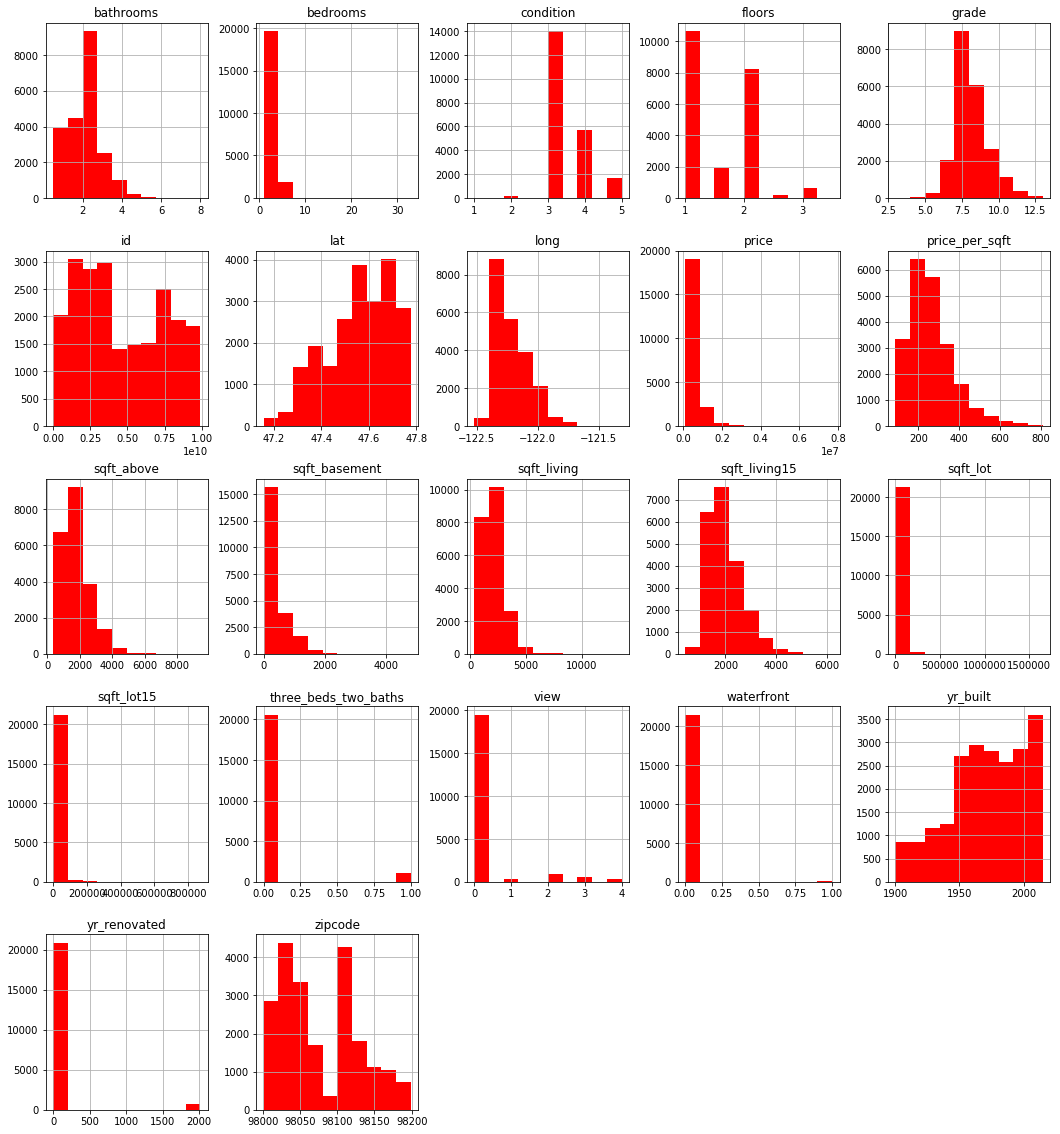

In [31]:
data_kc.hist(figsize=(18,20), color='red');
# I want to focus only on bathrooms, bedrooms, grade, sqft_above, sqft_basement, sqft_living, sqft_living15, 
# sqft_lot, sqft_lot15, price_per_sqft, view, waterfront, zipcode and 3beds/2baths

In [32]:
# Run first model
import statsmodels.api as sm
X = data_kc[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
             'grade', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'condition', 'zipcode', 
             'three_beds_two_baths', 'price_per_sqft', 'waterfront', 'view']]
Y = data_kc['price']
X1 = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()
# our model shows all variables against price with an r-squared of .965 - that's pretty high already but we can 
# improve
# There are variables that do not have p-values that we want (<0.05) are no variables
# bedrooms has a p-value of .619
# sqft_basement has a p-value that is less than 0.001
# Only using these columns because lat and long represent direction on a map that I feel is not neccessary to this
# yr_built and yr_renovated are years and I feel that it throws off the data that we were want to look at


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 3.703e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:31   Log-Likelihood:            -2.8367e+05
No. Observations:               21597   AIC:                         5.674e+05
Df Residuals:                   21581   BIC:                         5.675e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bathrooms             1.355e+04   1872.512      7.237      0.000    9880.563    1.72e+04
bedrooms              -579.0603   1164.968     -0.497      0.619   -2862.483    1704.362
sqft_living            249.0057     10.991     22.656      0.000     227.463     270.549
sqft_lot                -0.1214      0.029     -4.174      0.000      -0.178      -0.064
floors               -2.366e+04   2135.791    -11.080      0.000   -2.79e+04   -1.95e+04
grade                 1.804e+04   1313.184     13.734      0.000    1.55e+04    2.06e+04
sqft_above              46.2309     10.980      4.210      0.000      24.709      67.753
sqft_basement           35.6983     10.901      3.275      0.001      14.332      57.064
sqft_living15          -25.5672      2.043    -12.513      0.000     -29.572     -21.562
sqft_lot15              -0.1739      0.044     -3.909      0.000      -0.261      -0.087
condition             9035.2037   1361.833      6.635      0.000    6365.910    1.17e+04
zipcode                 -7.2439      0.095    -76.383      0.000      -7.430      -7.058
three_beds_two_baths  1.692e+04   3934.548      4.299      0.000    9203.392    2.46e+04
price_per_sqft        2000.5290      8.555    233.845      0.000    1983.761    2017.297
waterfront            2.875e+05   1.11e+04     25.856      0.000    2.66e+05    3.09e+05
view                  1.386e+04   1281.072     10.820      0.000    1.14e+04    1.64e+04
==============================================================================
Omnibus:                    21203.462   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7430201.591
Skew:                           4.118   Prob(JB):                         0.00
Kurtosis:                      93.494   Cond. No.                     1.34e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

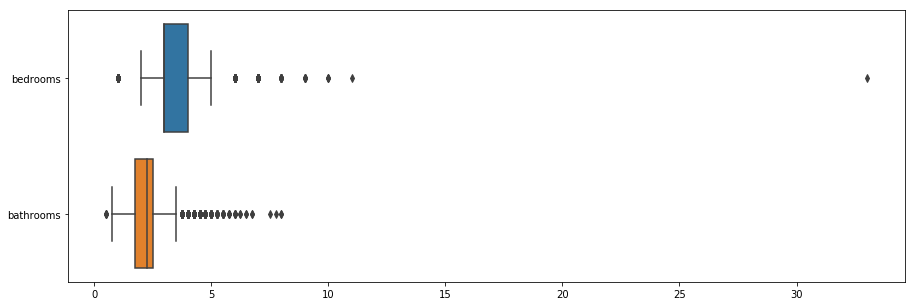

In [33]:
# Find outliers -- keep similiar numbers together bathroom and bedroom
plt.figure(figsize=(15,5))
sns.boxplot(data=data_kc.iloc[:,3:5], orient='h');
# bedrooms has a pretty far outlier of past 30 and greater than 5. The bathrooms show they're outliers at above 4.
# So lets take the outliers out
# 3beds/2baths do not need to be checked because they only have two vaules 1 and 0

In [34]:
data_kc = data_kc[data_kc.bedrooms < 6]
data_kc = data_kc[data_kc.bathrooms < 4.5]

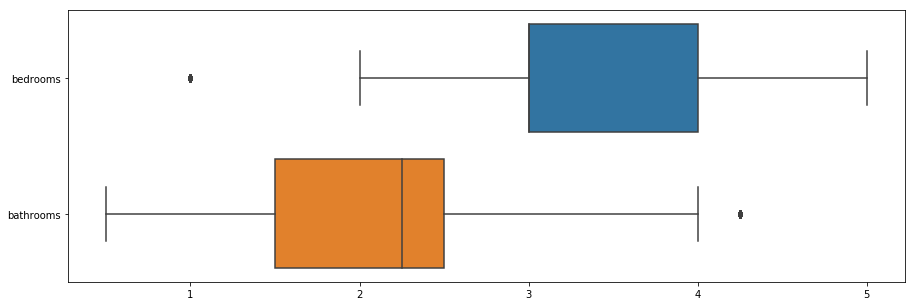

In [35]:
# Let's check the outliers again - for the bedrooms I took out too much when I did 5 so I restarted the kernal..
# figured it out, have to do the next one down and run it again...
plt.figure(figsize=(15,5))
sns.boxplot(data=data_kc.iloc[:,3:5], orient='h');

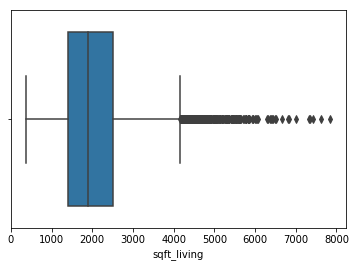

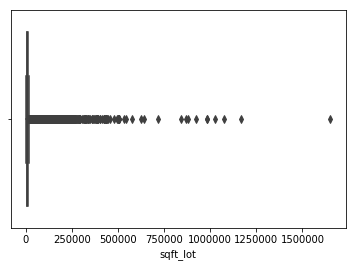

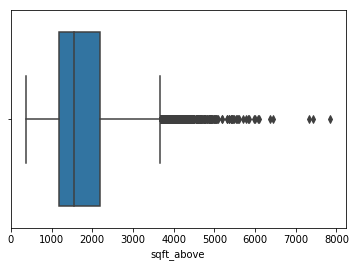

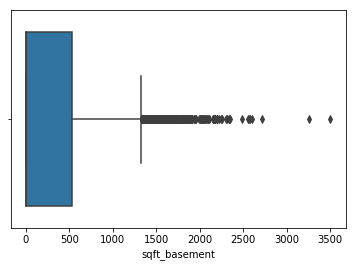

In [36]:
# Can't use the above method for the following plots of sqft because the numbers are too large
sqft_col = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_basement']
for col in sqft_col:
    fig, axs = plt.subplots(figsize=(6,4))
    sns.boxplot(data=data_kc, x=col)
# Looking at the boxplots looks like I could take out outliers from sqft_lot < 80000 and sqft_living < 4000 -- 
# I'm looking at where I see the break in the outliers

In [37]:
data_kc = data_kc[data_kc.sqft_lot < 80000]
data_kc = data_kc[data_kc.sqft_living < 4000]

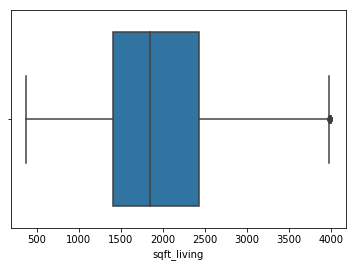

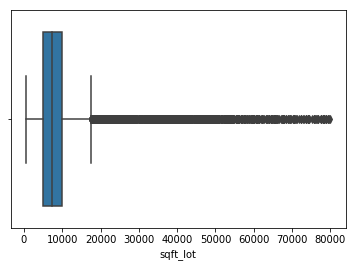

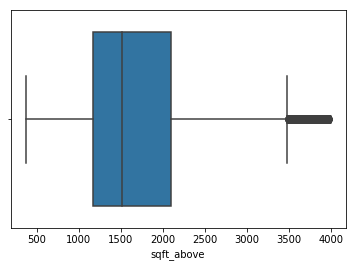

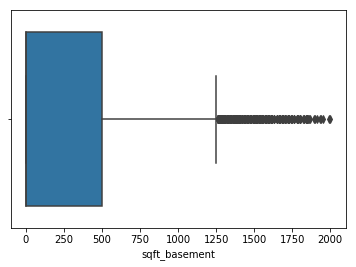

In [38]:
# Plot the boxplot again
for col in sqft_col:
    fig, axs = plt.subplots(figsize=(6,4))
    sns.boxplot(data=data_kc, x=col)

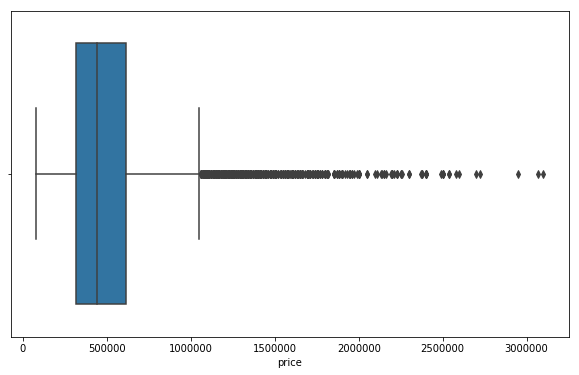

In [39]:
# Finally let's look at the target of price and see if we could get rid of any outliers there
plt.figure(figsize=(10,6))
sns.boxplot(data=data_kc, x='price'); # looking at the break in the outlier it looks to be right at price < 1750000

In [40]:
data_kc = data_kc[data_kc.price < 1750000]

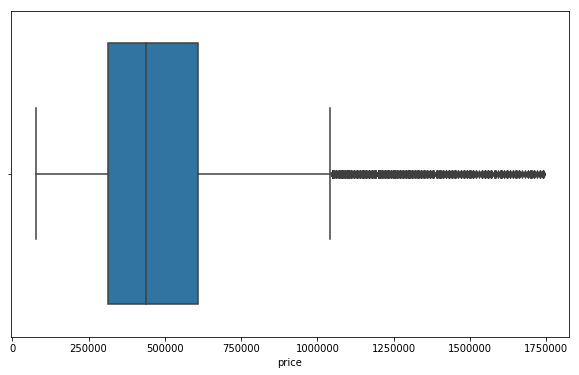

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data_kc, x='price');

In [42]:
X = data_kc[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
             'grade', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'condition', 'zipcode', 
             'three_beds_two_baths', 'price_per_sqft', 'waterfront', 'view']]
Y = data_kc['price']
X1 = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()
# after taking out outliers the r-squared increased to .982 but the p-values of many other features changed as well
# sqft_lot is .560 (>.05), floors is .075 (>.05),  sqft_above is .482 (>.05), sqft_basement is .420(>.05)
# and sqft_lot15 is .986(>.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 6.727e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:33   Log-Likelihood:            -2.5200e+05
No. Observations:               19948   AIC:                         5.040e+05
Df Residuals:                   19932   BIC:                         5.042e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bathrooms             6426.2608   1245.570      5.159      0.000    3984.841    8867.681
bedrooms              8279.8831    846.125      9.786      0.000    6621.409    9938.358
sqft_living            238.9174      8.140     29.350      0.000     222.962     254.873
sqft_lot                -0.0482      0.083     -0.583      0.560      -0.210       0.114
floors               -2507.2152   1407.642     -1.781      0.075   -5266.310     251.880
grade                 2.327e+04    856.410     27.166      0.000    2.16e+04    2.49e+04
sqft_above              -5.6991      8.102     -0.703      0.482     -21.579      10.181
sqft_basement            6.4862      8.050      0.806      0.420      -9.292      22.264
sqft_living15           -7.3993      1.447     -5.113      0.000     -10.236      -4.563
sqft_lot15               0.0011      0.063      0.018      0.986      -0.123       0.125
condition             1.167e+04    860.741     13.556      0.000    9981.239    1.34e+04
zipcode                 -6.5413      0.061   -106.520      0.000      -6.662      -6.421
three_beds_two_baths  1.432e+04   2426.079      5.903      0.000    9566.355    1.91e+04
price_per_sqft        1663.3121      5.737    289.941      0.000    1652.068    1674.557
waterfront              4.6e+04   8860.255      5.192      0.000    2.86e+04    6.34e+04
view                  1.488e+04    880.659     16.892      0.000    1.31e+04    1.66e+04
==============================================================================
Omnibus:                     2630.351   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30154.386
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       9.011   Cond. No.                     1.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# Let's set the id back to the index so we can clearly see the target of price.
data_kc = data_kc.set_index('id')
data_kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,three_beds_two_baths
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847,0
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521,0
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,233.766234,0
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265,0
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429,1


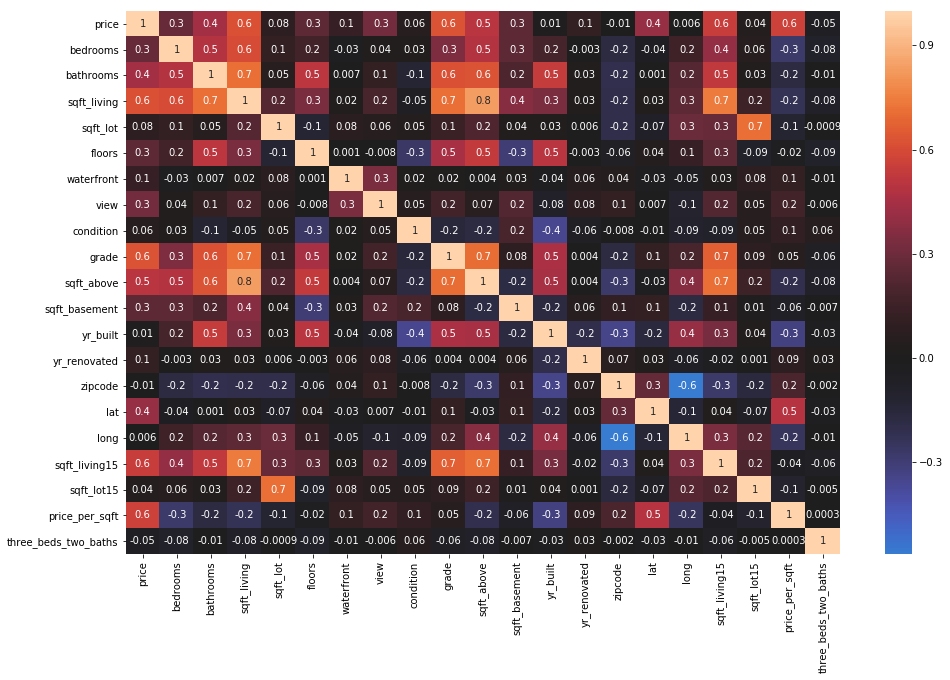

In [44]:
# A heatmap to show the correlation between the variables.  A lighter color shows that it has the
# highest correlation -- which we do not want (Mod01 - Sec08).
plt.figure(figsize=(16,10))
sns.heatmap(data_kc.corr(), annot=True, fmt='0.1g', center=0)
plt.show()
# Looking at the heatmap, the highest correlations (>.75) are sqft_above and sqft_living and if we look at the 
# target of price the one with the smallest value is sqft_above so that is the column we need to drop.

In [45]:
# dropping the column that has the smallest value with the target of price
data_kc.drop('sqft_above', axis=1, inplace=True)

In [46]:
data_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19948 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
date                    19948 non-null object
price                   19948 non-null float64
bedrooms                19948 non-null int64
bathrooms               19948 non-null float64
sqft_living             19948 non-null int64
sqft_lot                19948 non-null int64
floors                  19948 non-null float64
waterfront              19948 non-null float64
view                    19948 non-null float64
condition               19948 non-null int64
grade                   19948 non-null int64
sqft_basement           19948 non-null float64
yr_built                19948 non-null int64
yr_renovated            19948 non-null float64
zipcode                 19948 non-null int64
lat                     19948 non-null float64
long                    19948 non-null float64
sqft_living15           19948 non-null int64
sqft_lot15              19948 non-null int64
pri

In [47]:
X = data_kc[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
             'grade', 'sqft_basement','sqft_living15', 'sqft_lot15', 'condition', 'zipcode', 
             'three_beds_two_baths', 'price_per_sqft', 'waterfront', 'view']]
Y = data_kc['price']
X1 = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()
# the R-squared value stayed the same, and some of the p-values have improved.
# sqft_lot is .552 (>.05), floors is 0.62(>.05), sqft_lot15 is .989 (>.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 7.176e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:30:35   Log-Likelihood:            -2.5200e+05
No. Observations:               19948   AIC:                         5.040e+05
Df Residuals:                   19933   BIC:                         5.041e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bathrooms             6466.5609   1244.236      5.197      0.000    4027.756    8905.366
bedrooms              8288.1638    846.032      9.797      0.000    6629.871    9946.457
sqft_living            233.3189      1.711    136.380      0.000     229.966     236.672
sqft_lot                -0.0492      0.083     -0.595      0.552      -0.211       0.113
floors               -2613.5062   1399.491     -1.867      0.062   -5356.625     129.612
grade                 2.325e+04    856.263     27.158      0.000    2.16e+04    2.49e+04
sqft_basement           12.0090      1.777      6.758      0.000       8.526      15.492
sqft_living15           -7.4620      1.444     -5.166      0.000     -10.293      -4.631
sqft_lot15               0.0009      0.063      0.014      0.989      -0.123       0.125
condition             1.169e+04    860.351     13.583      0.000    9999.980    1.34e+04
zipcode                 -6.5408      0.061   -106.520      0.000      -6.661      -6.420
three_beds_two_baths  1.432e+04   2426.047      5.903      0.000    9564.577    1.91e+04
price_per_sqft        1663.4030      5.735    290.034      0.000    1652.162    1674.644
waterfront            4.598e+04   8860.089      5.190      0.000    2.86e+04    6.33e+04
view                   1.49e+04    879.789     16.940      0.000    1.32e+04    1.66e+04
==============================================================================
Omnibus:                     2630.615   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30153.588
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       9.011   Cond. No.                     1.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

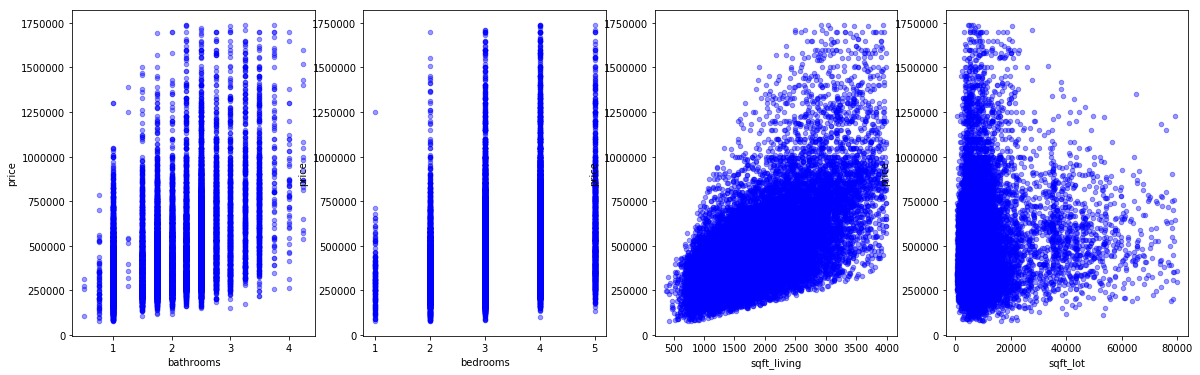

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,6))
for xcol, ax in zip(['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot'], axes):
    data_kc.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
# This shows that bathrooms and bedrooms are categorical variables and sqft_living and sqft_lot are continuous

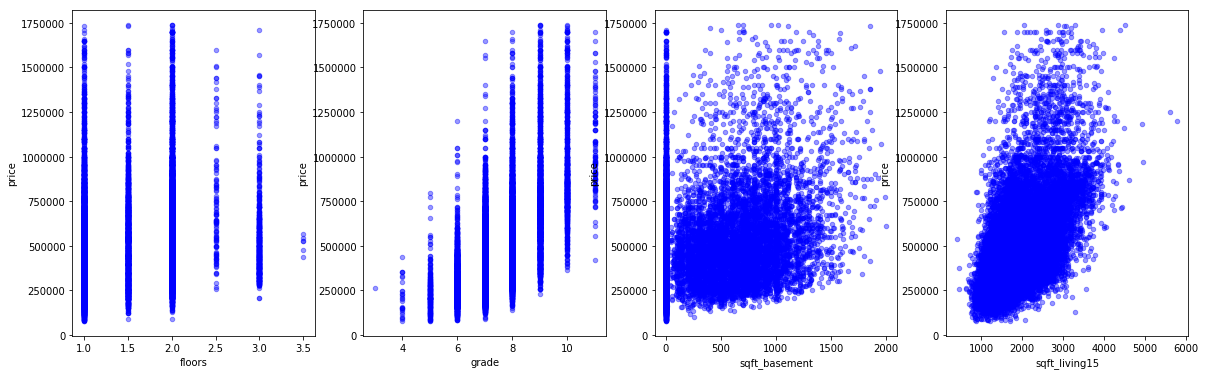

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,6))
for xcol, ax in zip(['floors', 'grade', 'sqft_basement', 'sqft_living15'], axes):
    data_kc.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
# This shows that floors and grade are categorical variables and sqft_basement and sqft_living15 are continous

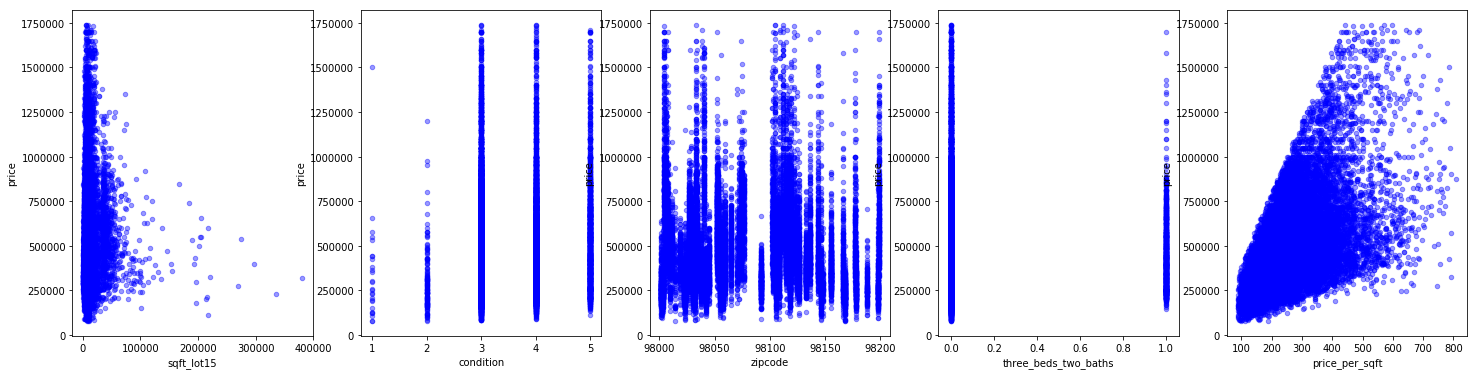

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25,6))
for xcol, ax in zip(['sqft_lot15', 'condition', 'zipcode', 'three_beds_two_baths', 'price_per_sqft'], axes):
    data_kc.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
# condition, zipcode, and 3beds/2baths are categorial and sqft_lot15 and price_per_sqft are continous

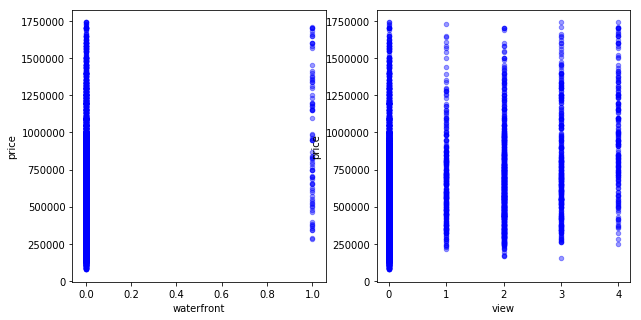

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
for xcol, ax in zip(['waterfront', 'view'], axes):
    data_kc.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
# waterfront and view are categorical

In [52]:
data_kc = data_kc.reset_index('id')
grades = data_kc.groupby('grade').count()['id']
mean = data_kc.groupby('grade').mean()['price_per_sqft']
combination = pd.concat([grades, mean], axis=1)
combination['grade'] = combination.index
combination.columns = ['grades', 'price_per_sqft', 'grade']
combination.describe()
# This tells me that the median grade is 8 for a house that sells for $307 per sqft.  The smallest grade is 3 
# which means that people are buying house with the smallest grade for $251 per sqft.

,grades,price_per_sqft,grade
count,9.000000,9.000000,9.000000
mean,2216.444444,309.606658,7.000000
std,3061.113854,77.769368,2.738613
min,1.000000,252.901867,3.000000
25%,113.000000,271.253847,5.000000
50%,775.000000,278.648759,7.000000
75%,2328.000000,308.292736,9.000000
max,8693.000000,503.846154,11.000000


In [53]:
# I want to find the best priced houses for the best grade given.
# So if the median grade is 7 that means that anything below 279 would be less quality
# Anything that is equal to greater than 308 would be a grade that is higher -- meaning better quality homes
# Looking at it, it seems that the lower half of houses fall into a grade of 5 an sell for 271 per sqft

# Used the idea from https://github.com/whitcrrd/kc_housing_linear_regression/blob/master/KC_linear_regression.ipynb

lower_quality_homes = combination[combination.price_per_sqft <= 271]
decsent_quality_homes = combination[combination.price_per_sqft >= 279]
best_quality_homes = combination[combination.price_per_sqft >= 504]

In [54]:
def home_quality(grade):
    if grade in lower_quality_homes.index:
        return 'low quality'
    elif grade in decsent_quality_homes.index:
        return 'good quality'
    else:
        return 'best quality'

In [55]:
data_kc['quality'] = data_kc.grade.apply(home_quality)

In [56]:
data_kc.quality.value_counts()

low quality     14487
best quality     4545
good quality      916
Name: quality, dtype: int64

In [81]:
data_kc.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,three_beds_two_baths,quality
19943,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,2009,0.0,98103,47.6993,-122.346,1530,1509,235.294118,0,low quality
19944,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2014,0.0,98146,47.5107,-122.362,1830,7200,173.160173,0,low quality
19945,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,2009,0.0,98144,47.5944,-122.299,1020,2007,394.216667,0,low quality
19946,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,2004,0.0,98027,47.5345,-122.069,1410,1287,250.000000,0,low quality
19947,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,2008,0.0,98144,47.5941,-122.299,1020,1357,318.627451,0,low quality


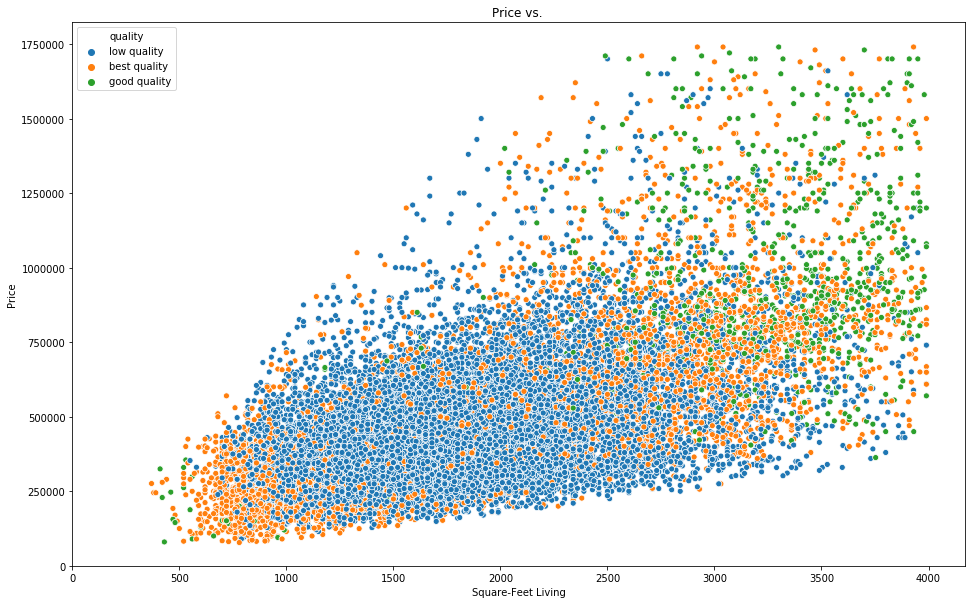

In [57]:
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x="sqft_living", y="price", data=data_kc, hue="quality")
plt.xlim(0,None)
plt.ylim(0,None)
plt.title("Price vs. ")
plt.xlabel("Square-Feet Living")
plt.ylabel("Price");
# This tells us that the good quality houses are actually being sold for more money than they are worth 
# The low quality houses are being sold for a range of money that is too high for the quality of homes
# The best quality houses are actually being sold affordable?

In [58]:
# Normalize and scale my continous features which are -- sqft_living/sqft_living15, sqft_lot/sqft_lot15, sqft_basement
# and price_per_sqft
continuous_features = [data_kc.sqft_living, data_kc.sqft_living15, data_kc.sqft_lot, 
                       data_kc.sqft_lot15, data_kc.sqft_basement, data_kc.price_per_sqft]
for col in continuous_features:
    continuous_features[col].plot.hist(density=True, label=col+' histogram')
    continuous_features[col].plot.kde(label=col+' kde')
    plt.legend()
    plt.show()

TypeError: list indices must be integers or slices, not Series

In [59]:
# Unable to normalize and scale my continuous features because of the error, thought that may be able
# to make a separate data set to isolate my continuous features
df_kc_con = data_kc[['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_basement', 'price_per_sqft']]

In [60]:
df_kc_con.head()

,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_basement,price_per_sqft
0,1180,1340,5650,5650,0.0,188.050847
1,2570,1690,7242,7639,400.0,209.338521
2,770,2720,10000,8062,0.0,233.766234
3,1960,1360,5000,5000,910.0,308.163265
4,1680,1800,8080,7503,0.0,303.571429


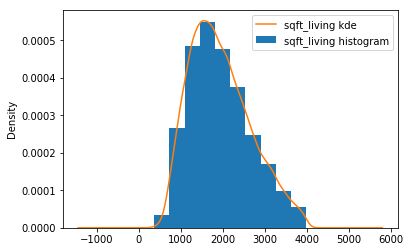

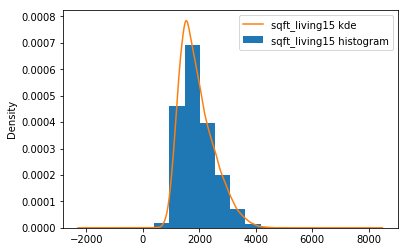

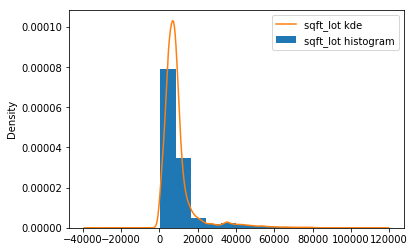

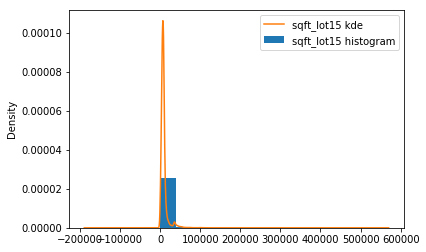

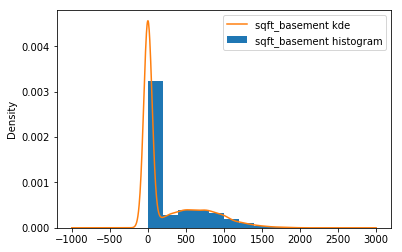

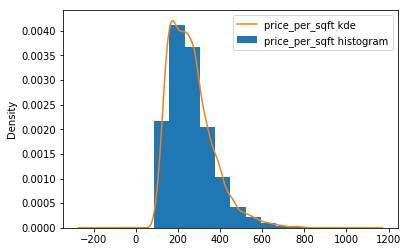

In [61]:
for col in df_kc_con:
    df_kc_con[col].plot.hist(density=True, label=col+' histogram')
    df_kc_con[col].plot.kde(label=col+' kde')
    plt.legend()
    plt.show()
# Observations: They all look like they are skewed to the right

In [62]:
# Use PowerTransformer to log transform and scale at the same time
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
df_kc_pt = pt.fit_transform(df_kc_con)
df_kc_pt = pd.DataFrame(df_kc_pt, columns=df_kc_con.columns)

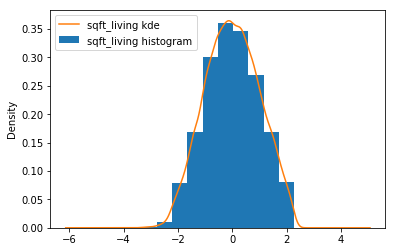

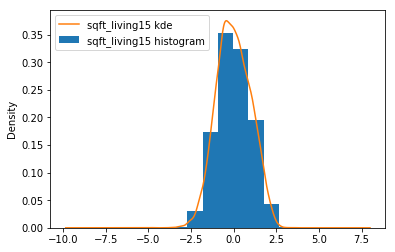

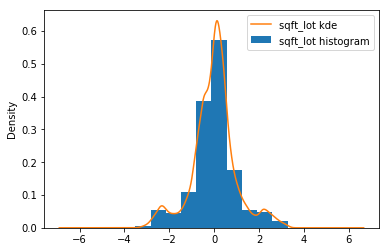

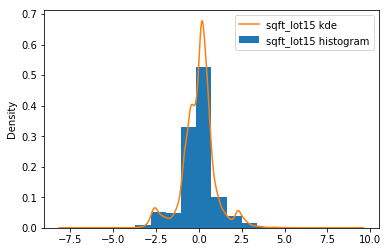

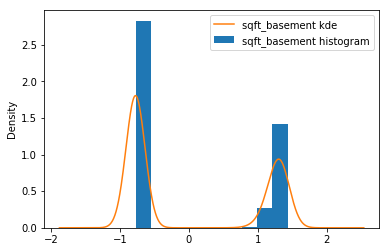

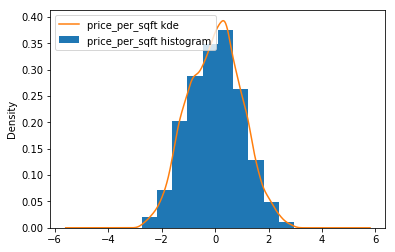

In [63]:
# Density plots of logged and scaled continous features -- make sure we're graphing the scaled ones.
for col in df_kc_pt:
    df_kc_pt[col].plot.hist(density=True, label=col+' histogram')
    df_kc_pt[col].plot.kde(label=col+' kde')
    plt.legend()
    plt.show()
# Way better

In [64]:
# Section 8 -- Transforming categorical variables -- Encode the categorical features -- which are
# bathrooms, bedrooms, floors, grade, condition, view, waterfront, zipcode, and 3beds/2baths

df_kc_cat = data_kc[['bathrooms', 'bedrooms', 'floors', 'grade', 'condition', 'view', 'waterfront',
                    'three_beds_two_baths']]
df_kc_cat.head()


,bathrooms,bedrooms,floors,grade,condition,view,waterfront,three_beds_two_baths
0,1.00,3,1.0,7,3,0.0,0.0,0
1,2.25,3,2.0,7,3,0.0,0.0,0
2,1.00,2,1.0,6,3,0.0,0.0,0
3,3.00,4,1.0,7,5,0.0,0.0,0
4,2.00,3,1.0,8,3,0.0,0.0,1


In [65]:
df_kc_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19948 entries, 0 to 19947
Data columns (total 8 columns):
bathrooms               19948 non-null float64
bedrooms                19948 non-null int64
floors                  19948 non-null float64
grade                   19948 non-null int64
condition               19948 non-null int64
view                    19948 non-null float64
waterfront              19948 non-null float64
three_beds_two_baths    19948 non-null int64
dtypes: float64(4), int64(4)
memory usage: 1.2 MB


In [66]:
df_kc_cat = df_kc_cat.astype('category')

In [67]:
df_kc_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19948 entries, 0 to 19947
Data columns (total 8 columns):
bathrooms               19948 non-null category
bedrooms                19948 non-null category
floors                  19948 non-null category
grade                   19948 non-null category
condition               19948 non-null category
view                    19948 non-null category
waterfront              19948 non-null category
three_beds_two_baths    19948 non-null category
dtypes: category(8)
memory usage: 158.0 KB


In [68]:
# Encode using pd.get_dummies -- one hot encoding of the categorical features -- section 8 -- drop_first=True
# to avoid the dummy variable trap
bathrooms = pd.get_dummies(df_kc_cat['bathrooms'], prefix='bath', drop_first=True)
bedrooms = pd.get_dummies(df_kc_cat['bedrooms'], prefix='bed', drop_first=True)
floors = pd.get_dummies(df_kc_cat['floors'], prefix='fl', drop_first=True)
grade = pd.get_dummies(df_kc_cat['grade'], prefix='grade', drop_first=True)
condition = pd.get_dummies(df_kc_cat['condition'], prefix='con', drop_first=True)
view = pd.get_dummies(df_kc_cat['view'], prefix='view', drop_first=True)
waterfront = pd.get_dummies(df_kc_cat['waterfront'], prefix='wf', drop_first=True)
three_beds_two_baths = pd.get_dummies(df_kc_cat['three_beds_two_baths'], prefix='three_two', drop_first=True)

In [69]:
df_kc_cat = pd.concat([df_kc_cat, bathrooms, bedrooms, floors, grade, condition, view, waterfront, 
                       three_beds_two_baths], axis=1)

In [70]:
df_kc_cat.head()

,bathrooms,bedrooms,floors,grade,condition,view,waterfront,three_beds_two_baths,bath_0.75,bath_1.0,...,con_2,con_3,con_4,con_5,view_1.0,view_2.0,view_3.0,view_4.0,wf_1.0,three_two_1
0,1.00,3,1.0,7,3,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,2.25,3,2.0,7,3,0.0,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.00,2,1.0,6,3,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,3.00,4,1.0,7,5,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.00,3,1.0,8,3,0.0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [71]:
df_kc_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19948 entries, 0 to 19947
Data columns (total 50 columns):
bathrooms               19948 non-null category
bedrooms                19948 non-null category
floors                  19948 non-null category
grade                   19948 non-null category
condition               19948 non-null category
view                    19948 non-null category
waterfront              19948 non-null category
three_beds_two_baths    19948 non-null category
bath_0.75               19948 non-null uint8
bath_1.0                19948 non-null uint8
bath_1.25               19948 non-null uint8
bath_1.5                19948 non-null uint8
bath_1.75               19948 non-null uint8
bath_2.0                19948 non-null uint8
bath_2.25               19948 non-null uint8
bath_2.5                19948 non-null uint8
bath_2.75               19948 non-null uint8
bath_3.0                19948 non-null uint8
bath_3.25               19948 non-null uint8
bath_3.5    

In [72]:
df_kc_cat.drop(['bathrooms', 'bedrooms', 'floors', 'grade', 'condition', 'view', 'waterfront',
                'three_beds_two_baths'], axis=1, inplace=True)

In [73]:
df_kc_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19948 entries, 0 to 19947
Data columns (total 42 columns):
bath_0.75      19948 non-null uint8
bath_1.0       19948 non-null uint8
bath_1.25      19948 non-null uint8
bath_1.5       19948 non-null uint8
bath_1.75      19948 non-null uint8
bath_2.0       19948 non-null uint8
bath_2.25      19948 non-null uint8
bath_2.5       19948 non-null uint8
bath_2.75      19948 non-null uint8
bath_3.0       19948 non-null uint8
bath_3.25      19948 non-null uint8
bath_3.5       19948 non-null uint8
bath_3.75      19948 non-null uint8
bath_4.0       19948 non-null uint8
bath_4.25      19948 non-null uint8
bed_2          19948 non-null uint8
bed_3          19948 non-null uint8
bed_4          19948 non-null uint8
bed_5          19948 non-null uint8
fl_1.5         19948 non-null uint8
fl_2.0         19948 non-null uint8
fl_2.5         19948 non-null uint8
fl_3.0         19948 non-null uint8
fl_3.5         19948 non-null uint8
grade_4        19948 non-nu

In [82]:
# combining the continous variables and the categorical variables together in a dataframe
# it gives me what I want without having to go back into orginal data_kc and dropping columns later
data_kc2 = pd.concat([df_kc_pt, df_kc_cat], axis=1)

In [84]:
data_kc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19948 entries, 0 to 19947
Data columns (total 48 columns):
sqft_living       19948 non-null float64
sqft_living15     19948 non-null float64
sqft_lot          19948 non-null float64
sqft_lot15        19948 non-null float64
sqft_basement     19948 non-null float64
price_per_sqft    19948 non-null float64
bath_0.75         19948 non-null uint8
bath_1.0          19948 non-null uint8
bath_1.25         19948 non-null uint8
bath_1.5          19948 non-null uint8
bath_1.75         19948 non-null uint8
bath_2.0          19948 non-null uint8
bath_2.25         19948 non-null uint8
bath_2.5          19948 non-null uint8
bath_2.75         19948 non-null uint8
bath_3.0          19948 non-null uint8
bath_3.25         19948 non-null uint8
bath_3.5          19948 non-null uint8
bath_3.75         19948 non-null uint8
bath_4.0          19948 non-null uint8
bath_4.25         19948 non-null uint8
bed_2             19948 non-null uint8
bed_3             199

In [ ]:
# We could drop the grade columns because

In [85]:
# Now time to run the model using a linear regression 
# html https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

import statsmodels.api as sm
X = data_kc2
Y = data_kc['price']
X1 = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

# The r-squared value is high, but there are alot of p-values that above .05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.600e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:17:11   Log-Likelihood:            -2.5053e+05
No. Observations:               19948   AIC:                         5.012e+05
Df Residuals:                   19900   BIC:                         5.015e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqft_living     1.841e+05   1188.282    154.916      0.000    1.82e+05    1.86e+05
sqft_living15  -3006.3569    812.942     -3.698      0.000   -4599.791   -1412.923
sqft_lot       -1720.5804   1243.177     -1.384      0.166   -4157.312     716.151
sqft_lot15      -932.6601   1217.728     -0.766      0.444   -3319.508    1454.188
sqft_basement   -425.2452    629.813     -0.675      0.500   -1659.730     809.240
price_per_sqft    1.8e+05    602.012    298.914      0.000    1.79e+05    1.81e+05
bath_0.75       4.655e+04   3.18e+04      1.465      0.143   -1.57e+04    1.09e+05
bath_1.0        6.106e+04   3.11e+04      1.965      0.049     164.955    1.22e+05
bath_1.25       7.287e+04   3.87e+04      1.885      0.059   -2902.647    1.49e+05
bath_1.5        6.292e+04   3.11e+04      2.022      0.043    1935.634    1.24e+05
bath_1.75       4.961e+04   3.11e+04      1.595      0.111   -1.13e+04    1.11e+05
bath_2.0        5.321e+04   3.12e+04      1.708      0.088   -7851.654    1.14e+05
bath_2.25       5.773e+04   3.11e+04      1.855      0.064   -3257.095    1.19e+05
bath_2.5        4.333e+04   3.11e+04      1.393      0.164   -1.76e+04    1.04e+05
bath_2.75       4.892e+04   3.12e+04      1.570      0.116   -1.21e+04     1.1e+05
bath_3.0        5.947e+04   3.12e+04      1.906      0.057   -1701.502    1.21e+05
bath_3.25       8.117e+04   3.13e+04      2.595      0.009    1.99e+04    1.42e+05
bath_3.5        6.315e+04   3.13e+04      2.020      0.043    1877.889    1.24e+05
bath_3.75       1.323e+05   3.21e+04      4.119      0.000    6.93e+04    1.95e+05
bath_4.0        7.863e+04   3.27e+04      2.402      0.016    1.45e+04    1.43e+05
bath_4.25       1.249e+05   3.51e+04      3.556      0.000     5.6e+04    1.94e+05
bed_2           1.549e+04   5414.493      2.860      0.004    4872.693    2.61e+04
bed_3           2.939e+04   5454.472      5.388      0.000    1.87e+04    4.01e+04
bed_4           2.721e+04   5600.812      4.859      0.000    1.62e+04    3.82e+04
bed_5           2.904e+04   5938.761      4.890      0.000    1.74e+04    4.07e+04
fl_1.5           352.4442   1886.963      0.187      0.852   -3346.160    4051.049
fl_2.0         -8804.4029   1694.993     -5.194      0.000   -1.21e+04   -5482.075
fl_2.5          1.852e+04   6769.286      2.736      0.006    5251.859    3.18e+04
fl_3.0         -1.833e+04   3618.676     -5.064      0.000   -2.54e+04   -1.12e+04
fl_3.5         -2.978e+04   2.83e+04     -1.052      0.293   -8.53e+04    2.57e+04
grade_4         5.141e+05   3.53e+04     14.548      0.000    4.45e+05    5.83e+05
grade_5         4.903e+05    3.3e+04     14.878      0.000    4.26e+05    5.55e+05
grade_6         4.529e+05    3.3e+04     13.736      0.000    3.88e+05    5.18e+05
grade_7         4.317e+05    3.3e+04     13.081      0.000    3.67e+05    4.96e+05
grade_8     

In [86]:
# section 08 - Stepwise selection with p-values

import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [87]:
result=stepwise_selection(X, Y, verbose=True)
print('resulting features:')
print(result)

Add  sqft_living                    with p-value 0.0
Add  price_per_sqft                 with p-value 0.0
Add  grade_10                       with p-value 1.14404e-169
Add  view_4.0                       with p-value 7.56045e-126
Add  grade_11                       with p-value 7.0863e-81
Add  grade_9                        with p-value 2.86721e-95
Add  bath_2.5                       with p-value 2.66108e-76
Add  view_3.0                       with p-value 1.29075e-42
Add  con_3                          with p-value 1.11713e-38
Add  grade_6                        with p-value 5.85559e-28
Add  grade_5                        with p-value 2.33518e-34
Add  bath_3.75                      with p-value 7.83758e-20
Add  wf_1.0                         with p-value 4.45226e-14
Add  bath_3.25                      with p-value 1.16459e-12
Add  view_2.0                       with p-value 5.55793e-11
Add  con_4                          with p-value 1.18636e-10
Add  bed_2                          wit

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  bath_0.75                      with p-value 0.00116983
Drop bath_1.5                       with p-value 0.128495
resulting features:
['sqft_living', 'price_per_sqft', 'grade_10', 'view_4.0', 'grade_11', 'grade_9', 'bath_2.5', 'view_3.0', 'con_3', 'grade_6', 'grade_5', 'bath_3.75', 'wf_1.0', 'bath_3.25', 'view_2.0', 'con_4', 'bed_2', 'view_1.0', 'sqft_living15', 'con_5', 'grade_4', 'fl_2.5', 'bath_4.25', 'bath_2.75', 'fl_2.0', 'bath_1.75', 'fl_3.0', 'sqft_lot', 'bath_2.0', 'bath_0.75']


In [88]:
# These are the columns that I should keep, which means I have to go back to my data_kc2 and see delete the other 
# columns
data_kc_col = data_kc2[['sqft_basement', 'grade_10', 'grade_9', 'grade_8', 'grade_11', 'price_per_sqft', 
            'sqft_living15', 'sqft_living', 'bed_2', 'view_4.0', 'bath_1.0', 'con_3', 'bath_0.75',
            'view_3.0', 'bed_3', 'bed_4', 'bed_5', 'con_4', 'fl_1.5', 'bath_3.75', 'view_2.0', 
            'fl_2.5', 'view_1.0', 'bath_3.25', 'bath_4.25', 'sqft_lot', 'bath_2.5']]

In [89]:
X = data_kc_col
Y = data_kc['price']
X1 = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.313e+04
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:27:06   Log-Likelihood:            -2.5380e+05
No. Observations:               19948   AIC:                         5.077e+05
Df Residuals:                   19921   BIC:                         5.079e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqft_basement   4469.2271    653.254      6.841      0.000    3188.794    5749.660
grade_10        1.291e+05   3746.189     34.452      0.000    1.22e+05    1.36e+05
grade_9         6.483e+04   2506.635     25.863      0.000    5.99e+04    6.97e+04
grade_8         1.365e+04   1605.321      8.505      0.000    1.05e+04    1.68e+04
grade_11        1.803e+05   8122.421     22.201      0.000    1.64e+05    1.96e+05
price_per_sqft  1.793e+05    694.138    258.347      0.000    1.78e+05    1.81e+05
sqft_living15  -4234.9351    936.898     -4.520      0.000   -6071.332   -2398.538
sqft_living     1.618e+05   1275.877    126.833      0.000    1.59e+05    1.64e+05
bed_2           4.165e+05   2698.648    154.330      0.000    4.11e+05    4.22e+05
view_4.0        1.465e+05   5952.419     24.618      0.000    1.35e+05    1.58e+05
bath_1.0        2.945e+04   1917.791     15.357      0.000    2.57e+04    3.32e+04
con_3           1.792e+04   2063.854      8.684      0.000    1.39e+04     2.2e+04
bath_0.75       1.662e+05   9910.379     16.768      0.000    1.47e+05    1.86e+05
view_3.0        6.266e+04   4397.817     14.248      0.000     5.4e+04    7.13e+04
bed_3           4.442e+05   2127.291    208.811      0.000     4.4e+05    4.48e+05
bed_4           4.552e+05   2255.300    201.826      0.000    4.51e+05     4.6e+05
bed_5           4.647e+05   3073.132    151.221      0.000    4.59e+05    4.71e+05
con_4           2.567e+04   2183.464     11.755      0.000    2.14e+04    2.99e+04
fl_1.5          1.142e+04   2119.359      5.388      0.000    7265.658    1.56e+04
bath_3.75       8.533e+04   9473.598      9.007      0.000    6.68e+04    1.04e+05
view_2.0        2.602e+04   3034.844      8.573      0.000    2.01e+04     3.2e+04
fl_2.5          3.209e+04   7791.176      4.119      0.000    1.68e+04    4.74e+04
view_1.0        3.353e+04   4872.140      6.883      0.000     2.4e+04    4.31e+04
bath_3.25       2.971e+04   4176.559      7.112      0.000    2.15e+04    3.79e+04
bath_4.25       7.964e+04   1.92e+04      4.142      0.000    4.19e+04    1.17e+05
sqft_lot        1666.7923    685.945      2.430      0.015     322.283    3011.301
bath_2.5       -6688.1614   1546.864     -4.324      0.000   -9720.144   -3656.179
==============================================================================
Omnibus:                    11945.735   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145063.176
Skew:                           2.699   Prob(JB):                         0.00
Kurtosis:                      15.058   Cond. No.                         49.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""